In [2]:
from utils import load_datasets
# from utils import run_models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from mrmr import mrmr_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
import pickle
import os

In [3]:
metrics_path = 'C:/Users/kchan/Documents/Biomarker Pipeline/CCNA2021_V4_Experiment4/Biomarker Spreadsheets/'
dataset = 'CCNA'
df_nabm,y_nabm = load_datasets(dataset,metrics_path+"NABMMetrics.xlsx",'NABM','Diagnosis',keep_info='File_Name')
df_penum,y_penum = load_datasets(dataset,metrics_path+'PenumbraMetrics.xlsx','Penumbra','Diagnosis')
df_bst,y_bst = load_datasets(dataset,metrics_path+'BSTMetrics.xlsx','BST','Diagnosis')
df_tract,y_tract = load_datasets(dataset,metrics_path+'TractMetrics.xlsx','Tracts','Diagnosis',keep_info='File_Name')

nan_rows  = df_nabm[df_nabm.isna().any(axis=1)]
df_nabm = df_nabm.drop(nan_rows.index)
df_nabm = df_nabm.reset_index()
y_nabm = y_nabm.drop(nan_rows.index)
y_nabm=y_nabm.reset_index()

df_penum = df_penum.drop(nan_rows.index)
df_penum = df_penum.reset_index()

df_bst = df_bst.drop(nan_rows.index)
df_bst = df_bst.reset_index()

nan_rows  = df_tract[df_tract.isna().any(axis=1)]
df_tract = df_tract.drop(nan_rows.index)
df_tract = df_tract.reset_index()


df1=df_nabm['File_Name']
df2 = df_tract['File_Name']
rmv_idx_from_nabm = []
rmv_idx_from_tract = []
x = 0
for f1 in df1:        
    if not f1 in df2.unique() :
        rmv_idx_from_nabm.append(x)
        
    x+=1

rmv_idx_from_nabm = np.array(rmv_idx_from_nabm)
df_nabm2 = df_nabm.drop(rmv_idx_from_nabm)
y_nabm2 = y_nabm.drop(rmv_idx_from_nabm)
df_nabm2=df_nabm2.reset_index()
y_nabm2=y_nabm2.reset_index()

train_labels = y_nabm2['Diagnosis']

df1 = df_nabm2['File_Name']

x=0
for f2 in df2:
    if not f2 in df1.unique():
        rmv_idx_from_tract.append(x)
        
    x+=1

rmv_idx_from_tract = np.array(rmv_idx_from_tract)

df_nabm2.drop(['File_Name','level_0','index'], axis=1, inplace=True)
df_nabm2.drop(['WML_Volume'], axis=1, inplace=True)


df_penum2 = df_penum.drop(rmv_idx_from_nabm)
df_penum2 =df_penum2.reset_index()
df_penum2.drop(['level_0','index'], axis=1, inplace=True)

df_bst2 = df_bst.drop(rmv_idx_from_nabm)
df_bst2=df_bst2.reset_index()
df_bst2.drop(['level_0','index'], axis=1, inplace=True)

df_tract2 = df_tract.drop(rmv_idx_from_tract)
df_tract2=df_tract2.reset_index()
df_tract2.drop(['File_Name','level_0','index'], axis=1, inplace=True)

from collections import Counter

counts = Counter(train_labels)
print('CIE:', counts['CIE'])
print('MCI:', counts['MCI'])
print('AD:', counts['AD'])
print('V-MCI:', counts['V-MCI'])
print('Mixed:', counts['Mixed'])


df_all = pd.concat([df_nabm2,df_penum2,df_bst2,df_tract2],axis=1)
df_all


CIE: 46
MCI: 64
AD: 20
V-MCI: 43
Mixed: 21


Mean_A3   Damage_A3  Entropy_A3  Energy_A3  Integrity_LBP  \
0    168.002317  405.734833   -0.553523   0.102756     122.050000   
1    165.750607  420.580048   -0.245847   0.099910     121.521164   
2    167.126637  475.766785   -0.458964   0.101906     122.142857   
3    166.292041  374.758545   -0.421467   0.101505     120.142857   
4    162.022091  398.762604    0.113928   0.096680     120.787594   
..          ...         ...         ...        ...            ...   
189  158.107177  418.897125    0.400698   0.093877     119.224080   
190  149.831818  511.643829    1.444190   0.084288     116.238095   
191  165.249146  389.175720   -0.445661   0.101691     121.954451   
192  169.504728  392.212646   -0.767918   0.104647     122.377976   
193  163.026325  401.300201   -0.104750   0.098661     120.739130   

     Damage_Macro  A3 Mean P1  Damage_Macro P1  Integrity P1  Intensity P1  \
0     2671.442008  169.227235     16959.908171    134.970419    295.553741   
1     3011.364724  133.040572     16122.285578    134.353471    290.439850   
2     3004.170817  139.152161     16815.000244    129.296084    290.747528   
3     2995.305544  166.762859     17832.955015    120.744882    307.953369   
4     3283.877316  140.284314     16833.855828    128.050137    294.560303   
..            ...         ...              ...           ...           ...   
189   3401.638379  142.249740     17762.949330    116.935942    305.288696   
190   4636.995183  131.397225     18956.836948    115.769370    313.554993   
191   3004.833168  131.610204     18280.847547    121.056614    311.893677   
192   2698.092841  155.915323     17399.292084    134.802109    302.069946   
193   3227.837171  127.043427     17849.033004    124.663880    305.915527   

     ...  ilf_l Damage_A3  ilf_r Damage_A3  slf1_l Damage_A3  \
0    ...       323.899984       337.301178        176.993731   
1    ...       371.894852       438.875793        234.588898   
2    ...       554.548161       541.666504        267.411377   
3    ...       202.515636       356.747449        222.857531   
4    ...       311.594322       294.491810        219.769563   
..   ...              ...              ...               ...   
189  ...       240.110825       309.956160        302.270515   
190  ...       335.756245       337.871613        436.129356   
191  ...       279.860255       408.730713        217.700919   
192  ...       321.175710       326.257107        220.380707   
193  ...       254.049240       412.720458        238.603138   

     slf1_r Damage_A3  slf2_l Damage_A3  slf2_r Damage_A3  slf3_l Damage_A3  \
0          224.876836        235.324951        253.783951        215.968830   
1          219.995445        275.364410        290.437600        230.999995   
2          295.482109        318.812182        328.505447        282.606369   
3          291.698792        353.145563        265.269257        229.805290   
4          218.966469        258.763293        220.958282        223.788345   
..                ...               ...               ...               ...   
189        281.902662        414.503418        425.661835        374.672791   
190        441.303970        633.227234        515.196119        400.460205   
191        231.245760        239.926624        370.027767        192.365349   
192        249.696625        262.269226        289.598289        255.810242   
193        218.073545        288.031067        304.577733        190.951141   

     slf3_r Damage_A3  uf_l Damage_A3  uf_r Damage_A3  
0          240.925003      460.700961      443.593086  
1          301.065725      362.601746      550.564758  
2          381.546519      445.246643      581.546295  
3          357.691701      294.098278      424.533951  
4          198.856064      427.648682      574.795804  
..                ...             ...             ...  
189        373.301178      584.905420      644.433477  
190        505.635834      527.422173      624.942993  
191        263.54433

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from scipy import interp
import shap
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, roc_auc_score, accuracy_score, auc, roc_curve
import statsmodels.api as sm
from scipy.interpolate import interp1d, UnivariateSpline

def run_models(mdl,dataset,X,y,iterations=5,n_classes=3,cv='cv',show_plots='show_plots'):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = random.seed(1234)) # 70% training and 30% test
    sc = StandardScaler()

    
    if mdl=='rf' or mdl=='rfc' or mdl=='randomforest':
        if cv == 'cv':
            cv = StratifiedKFold(n_splits=iterations)
            model=RandomForestClassifier(n_estimators=10000,random_state = 42,class_weight='balanced')

            accuracy = np.zeros([iterations,1])
            predicted_targets = np.array([])
            actual_targets = np.array([])
            
            if show_plots=='show_plots':
                plt.figure(figsize = (20, 7))
            if dataset=='CCNA':
                holder_auc = np.zeros([iterations,n_classes*2])
            else:
                holder_auc = np.zeros([iterations,1])


            tprs = []
            mean_fpr = np.linspace(0,1,100)
            
            list_shap_values = list()
            list_test_sets = list()
            thresholds = []
            
            for n, (train, test) in enumerate(cv.split(X, y)):
                X_train = sc.fit_transform(X.iloc[train])
                X_test = sc.fit_transform(X.iloc[test])
                y_train = y.iloc[train]
                y_test = y.iloc[test]
                model.fit(X_train, y_train)
#                 print(model.classes_)
                explainer = shap.TreeExplainer(model)
                shap_values = explainer.shap_values(X_test)
                list_shap_values.append(shap_values)
                list_test_sets.append(test)
                
                
                y_pred=model.predict(X_test)
                predicted_targets = np.append(predicted_targets,y_pred) 
                actual_targets = np.append(actual_targets,y_test)
                
                y_proba = model.predict_proba(X_test)
                accuracy[n]=accuracy_score(y_test, y_pred)
                classes = model.classes_

                classes_combinations = []
                class_list = list(classes)
                for i in range(len(class_list)):
                    for j in range(i+1, len(class_list)):
                        classes_combinations.append([class_list[j], class_list[i]])

                bins = [i/20 for i in range(20)] + [1]
                roc_auc_ovo = {}

                tprs_holder=[]
                for i in range(len(classes_combinations)):
                    # Gets the class
                    comb = classes_combinations[i]
                    c1 = comb[0]
                    c2 = comb[1]
                    c1_index = class_list.index(c1)
                    title = c1 + " vs " +c2

                    # Prepares an auxiliar dataframe to help with the plots
                    df_aux = pd.DataFrame()
    #                 df_aux['Class']=
    #                 df_aux = X_test.copy()
                    df_aux['class'] = y_test
                    df_aux['prob'] = y_proba[:, c1_index]

                    # Slices only the subset with both classes
                    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
                    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
                    df_aux = df_aux.reset_index(drop = True)
#                     tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
                    fpr,tpr,t = roc_curve(df_aux['class'],df_aux['prob'])
                    tprs_holder.append(interp(mean_fpr,fpr,tpr))
        
                    if show_plots=='show_plots':
                        # Plots the probability distribution for the class and the rest
                        ax = plt.subplot(2, 5, i+1) 
                        plot_roc_curve(tpr, fpr, scatter = False, ax = ax,alpha=0.3)
                        ax.set_title("ROC Curve OvO {0}".format(str(comb)))


                    # Calculates the ROC AUC OvO
                    roc_auc_ovo[title] = roc_auc_score(df_aux['class'], df_aux['prob'])
                
                tprs.append(tprs_holder)
#                 print(len(tprs),len(tprs[0]))
                
        
                if show_plots=='show_plots':  
                    plot_roc_curve(mean_tpr, mean_fpr, scatter = False, ax = ax)
                    plt.tight_layout()

                x = 0
                for k in roc_auc_ovo:
#                     print(k)
                    holder_auc[n,x]+=roc_auc_ovo[k]
                    x+=1
                
            mean_tpr = np.mean(tprs,axis=0)
            print(len(mean_tpr),len(mean_tpr[0]))
            
            test_set = list_test_sets[0]
            shap_values = np.array(list_shap_values[0])
            
            # concatenate SHAP values for all CV folds
            for i in range(1,len(list_test_sets)):
                test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
                shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=1)
            
            # Bringing back variable names    
            X_test = pd.DataFrame(X.iloc[test_set],columns=X.columns)
            y_test = pd.DataFrame(y.iloc[test_set])
            print(y_test.shape)
            shap.summary_plot(shap_values[1], X_test)
            
            # get top SHAP feature data points
            vals=np.abs(shap_values.mean(0))
            feat_importance = pd.DataFrame(list(zip(X_test.columns,sum(vals))),columns=['col_name','feature_importance_vals'])
            feat_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True,ignore_index=True)
            print(feat_importance)
            top = feat_importance['col_name'][0]
            print(top)
            idx = np.where(X_test.columns==top)[0][0]
            x_sv = np.asarray(X_test.iloc[:,idx])
            y_sv = shap_values[1,:,idx]
            labels_sv = np.asarray(y_test)
            print(x_sv.shape)
            print(y_sv.shape)
            print(labels_sv.shape)
            
            # get lowess regression line
            lowess = sm.nonparametric.lowess(y_sv,x_sv,frac=.5)            
            lowess_x = lowess[:,0]
            lowess_y = lowess[:,1]
            
            f = interp1d(lowess_y, lowess_x, bounds_error=False)
            
            # get threshold at y = 0
            thresholds.append(f(0))
            
            _,ax = plt.subplots()
#             plt.plot(*list(zip(*lowess)),color="red",)            
            plt.hlines(y=0,xmin=min(lowess_x),xmax=max(lowess_x),color='k',linestyles='dashed')
            plt.plot(f(0),0,'*',color='black')
            plt.text(f(0),-0.01,"{:.2f}".format(f(0)))
            
            plt.vlines(f(0),ymin=min(y_sv),ymax=max(y_sv),linestyles='dashed',color='red')
            
#             shap.dependence_plot("rank(0)", shap_values[1], X_test,interaction_index=None,ax=ax)
            
            # CHECK LABELS OF DATA POINTS
            groups = np.unique(labels_sv)
            N = 0
            for label in labels_sv:
                if label==groups[0]:
                    plt.scatter(x_sv[N],y_sv[N],s=10,color='blue',marker='^')
                elif label==groups[1]:
                    plt.scatter(x_sv[N],y_sv[N],s=10,color='orange')
                N+=1
                    
            plt.xlabel(top)
            plt.ylabel('SHAP values')
            
            plt.show()
 
        
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            model=RandomForestClassifier(n_estimators=100,random_state = 42)

            accuracy = np.zeros([iterations,1])
            if show_plots=='show_plots':
                plt.figure(figsize = (20, 7))
            if dataset=='CCNA':
                holder_auc = np.zeros([iterations,n_classes])
            else:
                holder_auc = np.zeros([iterations,1])

            for iter in range(iterations):

                model.fit(X_train, y_train)

                y_pred=model.predict(X_test)
                y_proba = model.predict_proba(X_test)
                accuracy[iter]=metrics.accuracy_score(y_test, y_pred)
                classes = model.classes_

                classes_combinations = []
                class_list = list(classes)
                for i in range(len(class_list)):
                    for j in range(i+1, len(class_list)):
                        classes_combinations.append([class_list[j], class_list[i]])

                bins = [i/20 for i in range(20)] + [1]
                roc_auc_ovo = {}

                for i in range(len(classes_combinations)):
                    # Gets the class
                    comb = classes_combinations[i]
                    c1 = comb[0]
                    c2 = comb[1]
                    c1_index = class_list.index(c1)
                    title = c1 + " vs " +c2

                    # Prepares an auxiliar dataframe to help with the plots
                    df_aux = pd.DataFrame()
    #                 df_aux['Class']=
    #                 df_aux = X_test.copy()
                    df_aux['class'] = y_test
                    df_aux['prob'] = y_proba[:, c1_index]

                    # Slices only the subset with both classes
                    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
                    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
                    df_aux = df_aux.reset_index(drop = True)

                    if show_plots=='show_plots':
                        # Plots the probability distribution for the class and the rest
                        ax = plt.subplot(2, 5, i+1)
                        tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
                        plot_roc_curve(tpr, fpr, scatter = False, ax = ax)
                        ax.set_title("ROC Curve OvO {0}".format(str(comb)))


                    # Calculates the ROC AUC OvO
                    roc_auc_ovo[title] = roc_auc_score(df_aux['class'], df_aux['prob'])
                
                if show_plots=='show_plots':
                    plt.tight_layout()

                x = 0
                for k in roc_auc_ovo:
                    holder_auc[iter,x]+=roc_auc_ovo[k]
                    x+=1

        model_auc = (holder_auc[0][:]+holder_auc[1][:]+holder_auc[2][:]+holder_auc[3][:]+holder_auc[4][:])
        model_auc = np.array(model_auc)/iterations
        if dataset=='CAIN':
            model_auc = model_auc[0]

        print("Model AUC",model_auc)
        model_accuracy = np.mean(accuracy)
        
        rf_feature_imp = pd.Series(model.feature_importances_,index=X.keys()).sort_values(ascending=False)
        if show_plots=='show_plots':
            fig2,ax2 = plt.subplots(figsize=(10,7))
            sns.barplot(x=rf_feature_imp, y=rf_feature_imp.index,ax = ax2)
            plt.xlabel('Feature Importance Score')
            plt.ylabel('Features')
            plt.title("Visualizing Important Features")
            plt.show()
        
        top_feat = rf_feature_imp.index[0:5]
    return model_accuracy,model_auc,mean_tpr,predicted_targets,actual_targets,thresholds

# Run Classifications with SHAP

['CIE', 'MCI']
Category:  nabm
1 100
(110, 1)


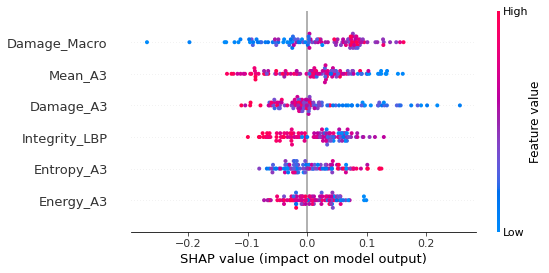

        col_name  feature_importance_vals
0        Mean_A3             3.931469e-14
1   Damage_Macro             3.768730e-14
2      Damage_A3             3.112400e-14
3  Integrity_LBP             2.838082e-14
4     Entropy_A3             2.074645e-14
5      Energy_A3             1.752971e-14
Mean_A3
(110,)
(110,)
(110, 1)


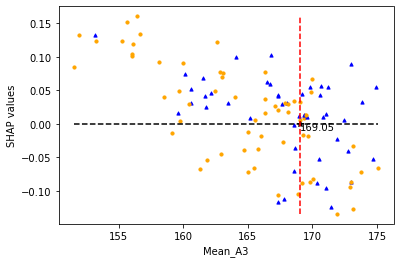

Model AUC [0.49837607 0.         0.         0.        ]
Mean accuracy:  0.47272727272727266
Category:  bst
1 100
(110, 1)


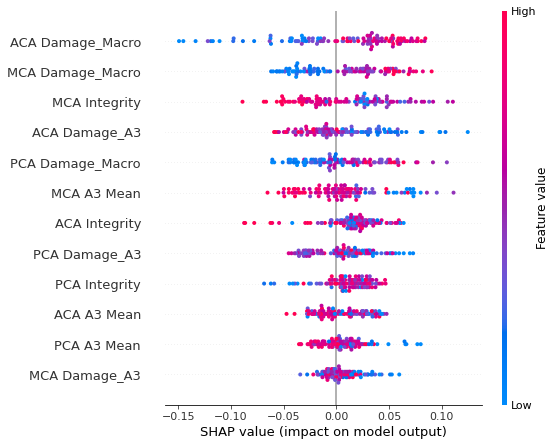

            col_name  feature_importance_vals
0   ACA Damage_Macro             1.482197e-14
1      MCA Integrity             1.286038e-14
2   MCA Damage_Macro             1.200071e-14
3   PCA Damage_Macro             1.002437e-14
4        MCA A3 Mean             9.484695e-15
5      ACA Damage_A3             9.059539e-15
6      ACA Integrity             8.888560e-15
7      PCA Damage_A3             6.992264e-15
8        ACA A3 Mean             6.862837e-15
9      PCA Integrity             6.030454e-15
10       PCA A3 Mean             5.912961e-15
11     MCA Damage_A3             3.924839e-15
ACA Damage_Macro
(110,)
(110,)
(110, 1)


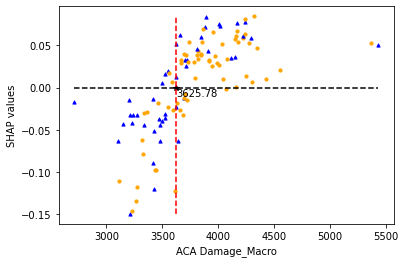

Model AUC [0.6384188 0.        0.        0.       ]
Mean accuracy:  0.6272727272727272
Category:  penumbra
1 100
(110, 1)


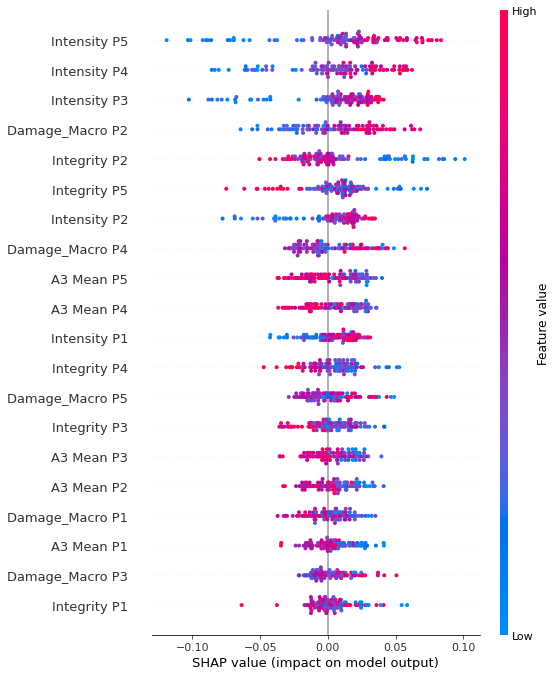

           col_name  feature_importance_vals
0      Intensity P5             1.108876e-14
1      Intensity P4             8.428425e-15
2      Intensity P3             7.374011e-15
3      Integrity P2             7.064241e-15
4   Damage_Macro P2             5.896830e-15
5      Intensity P2             4.995475e-15
6      Integrity P5             4.897438e-15
7        A3 Mean P4             4.836287e-15
8   Damage_Macro P4             4.202110e-15
9      Integrity P3             4.109343e-15
10       A3 Mean P5             3.975010e-15
11     Integrity P4             3.970545e-15
12       A3 Mean P2             3.779619e-15
13  Damage_Macro P5             3.692649e-15
14       A3 Mean P1             3.333840e-15
15       A3 Mean P3             3.321995e-15
16     Intensity P1             3.116505e-15
17     Integrity P1             3.111823e-15
18  Damage_Macro P1             3.047686e-15
19  Damage_Macro P3             2.518981e-15
Intensity P5
(110,)
(110,)
(110, 1)


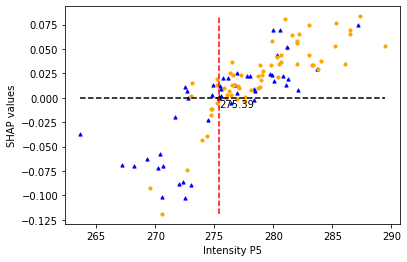

Model AUC [0.68726496 0.         0.         0.        ]
Mean accuracy:  0.6454545454545454
Category:  tract
1 100
(110, 1)


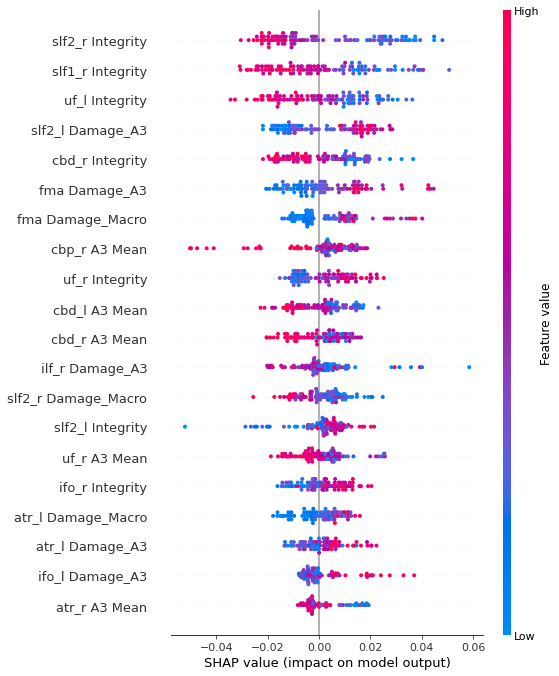

              col_name  feature_importance_vals
0     slf2_r Integrity             3.483704e-15
1     slf1_r Integrity             2.909213e-15
2       uf_l Integrity             2.522125e-15
3      cbd_r Integrity             2.209618e-15
4        fma Damage_A3             2.082807e-15
..                 ...                      ...
83  cst_l Damage_Macro             2.421138e-16
84    slf3_l Integrity             2.419063e-16
85  cbd_r Damage_Macro             2.372234e-16
86       cst_r A3 Mean             1.886029e-16
87  ilf_l Damage_Macro             1.818351e-16

[88 rows x 2 columns]
slf2_r Integrity
(110,)
(110,)
(110, 1)


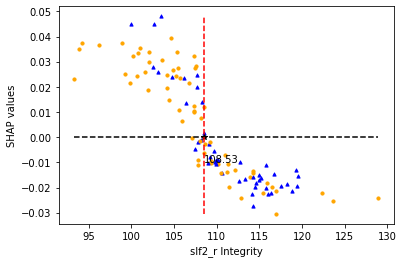

Model AUC [0.61188034 0.         0.         0.        ]
Mean accuracy:  0.6272727272727272
Category:  all
1 100
(110, 1)


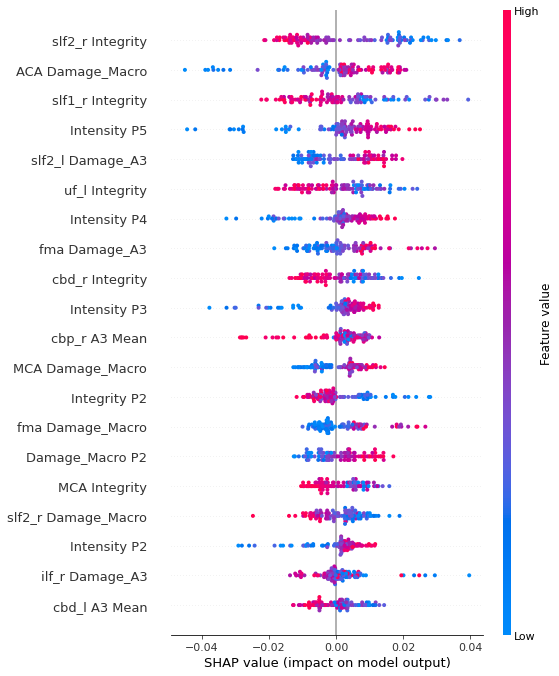

               col_name  feature_importance_vals
0      slf2_r Integrity             2.261320e-15
1          Intensity P5             1.961073e-15
2      slf1_r Integrity             1.889141e-15
3      ACA Damage_Macro             1.693253e-15
4      slf2_l Damage_A3             1.626195e-15
..                  ...                      ...
121       fmi Integrity             1.369549e-16
122    slf3_l Damage_A3             1.303685e-16
123       cst_r A3 Mean             1.137243e-16
124  ilf_l Damage_Macro             1.032330e-16
125       MCA Damage_A3             1.026595e-16

[126 rows x 2 columns]
slf2_r Integrity
(110,)
(110,)
(110, 1)


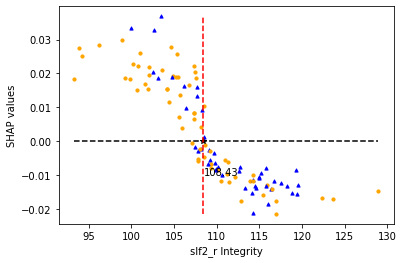

Model AUC [0.61854701 0.         0.         0.        ]
Mean accuracy:  0.6181818181818182
['CIE', 'AD']
Category:  nabm
1 100
(66, 1)


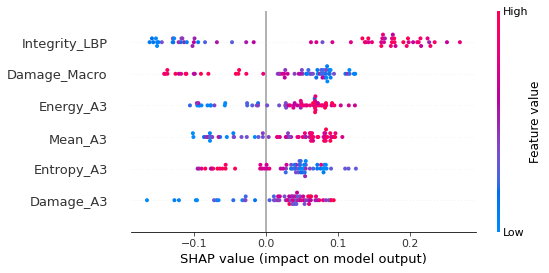

        col_name  feature_importance_vals
0  Integrity_LBP             3.478641e-14
1   Damage_Macro             1.009045e-14
2        Mean_A3             1.004535e-14
3      Energy_A3             8.092810e-15
4     Entropy_A3             7.301478e-15
5      Damage_A3             5.654765e-15
Integrity_LBP
(66,)
(66,)
(66, 1)


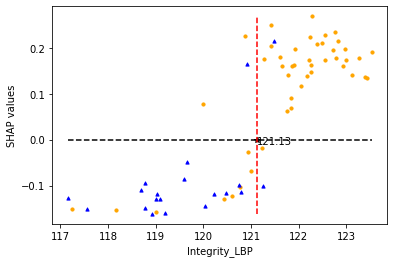

Model AUC [0.91888889 0.         0.         0.        ]
Mean accuracy:  0.8791208791208792
Category:  bst
1 100
(66, 1)


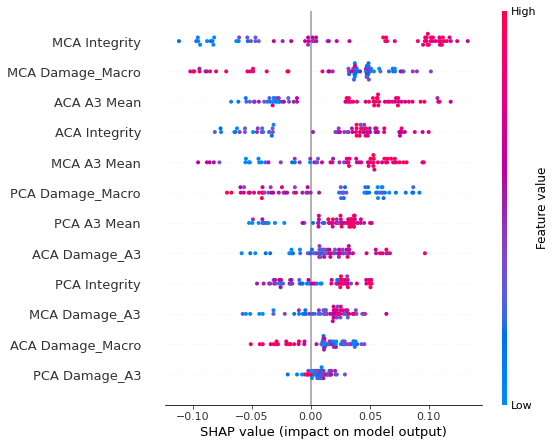

            col_name  feature_importance_vals
0        ACA A3 Mean             8.407337e-15
1   MCA Damage_Macro             6.623174e-15
2        MCA A3 Mean             6.358737e-15
3      MCA Integrity             6.258665e-15
4   PCA Damage_Macro             5.618363e-15
5      ACA Integrity             5.483244e-15
6      PCA Integrity             3.250059e-15
7      ACA Damage_A3             2.537277e-15
8        PCA A3 Mean             2.178271e-15
9      MCA Damage_A3             2.156803e-15
10  ACA Damage_Macro             1.978018e-15
11     PCA Damage_A3             4.858445e-16
ACA A3 Mean
(66,)
(66,)
(66, 1)


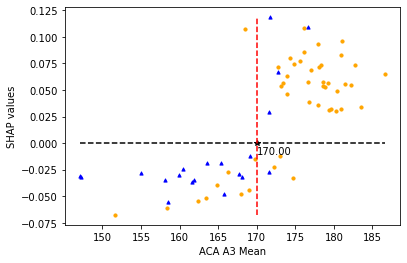

Model AUC [0.90222222 0.         0.         0.        ]
Mean accuracy:  0.8340659340659341
Category:  penumbra
1 100
(66, 1)


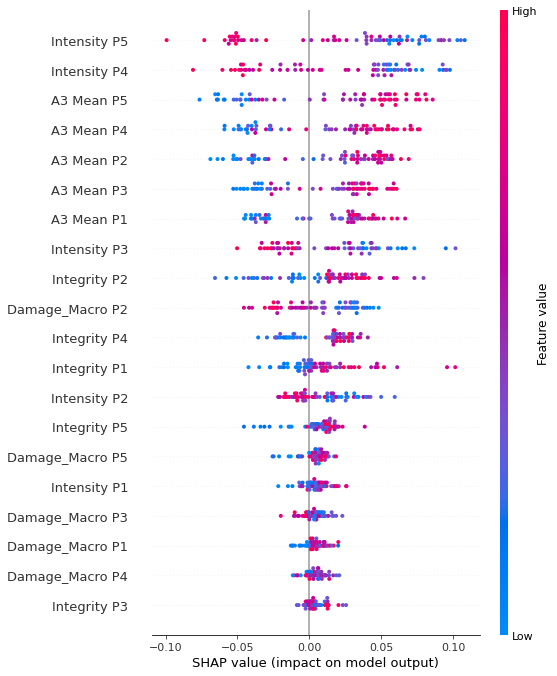

           col_name  feature_importance_vals
0      Intensity P5             5.145624e-15
1      Intensity P4             5.040564e-15
2        A3 Mean P5             4.142574e-15
3        A3 Mean P4             3.461207e-15
4      Intensity P3             3.241764e-15
5        A3 Mean P3             3.119900e-15
6        A3 Mean P2             3.103854e-15
7        A3 Mean P1             2.940600e-15
8      Integrity P2             2.536599e-15
9   Damage_Macro P2             1.997588e-15
10     Integrity P4             1.458902e-15
11     Integrity P1             1.133513e-15
12     Intensity P2             9.201624e-16
13     Integrity P5             7.245994e-16
14     Intensity P1             4.148907e-16
15  Damage_Macro P5             4.092457e-16
16  Damage_Macro P1             3.795538e-16
17  Damage_Macro P3             3.535346e-16
18  Damage_Macro P4             3.356554e-16
19     Integrity P3             2.538592e-16
Intensity P5
(66,)
(66,)
(66, 1)


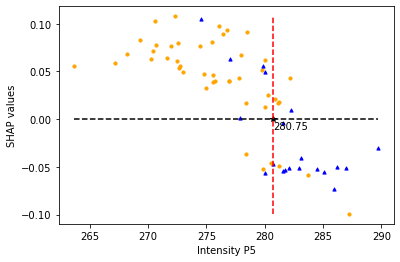

Model AUC [0.85333333 0.         0.         0.        ]
Mean accuracy:  0.8076923076923078
Category:  tract
1 100
(66, 1)


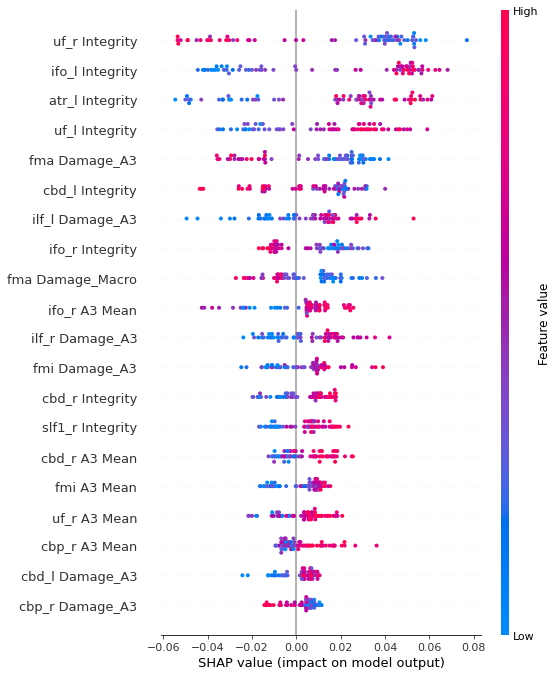

             col_name  feature_importance_vals
0      uf_r Integrity             2.665443e-15
1     atr_l Integrity             2.453333e-15
2     ifo_l Integrity             2.346986e-15
3      uf_l Integrity             1.238159e-15
4       fma Damage_A3             1.196851e-15
..                ...                      ...
83  uf_l Damage_Macro             1.664250e-17
84    cbp_l Integrity             1.462318e-17
85    atr_r Damage_A3             1.403364e-17
86    atr_r Integrity             1.070311e-17
87    atr_l Damage_A3             9.764596e-18

[88 rows x 2 columns]
uf_r Integrity
(66,)
(66,)
(66, 1)


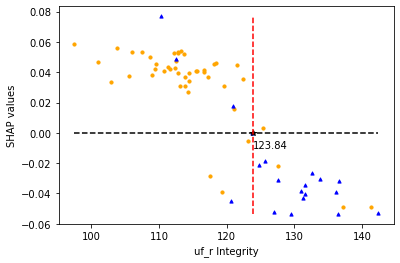

Model AUC [0.94666667 0.         0.         0.        ]
Mean accuracy:  0.8494505494505494
Category:  all
1 100
(66, 1)


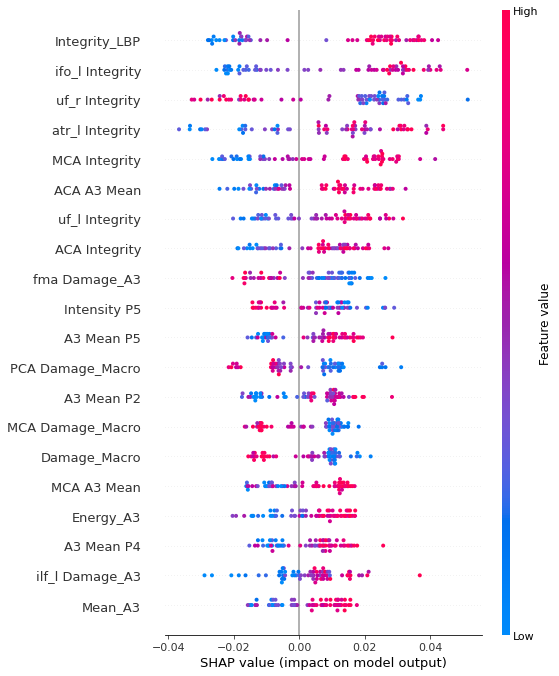

             col_name  feature_importance_vals
0       Integrity_LBP             1.273504e-15
1      uf_r Integrity             1.132829e-15
2     ifo_l Integrity             1.119872e-15
3       MCA Integrity             9.176687e-16
4     atr_l Integrity             7.418111e-16
..                ...                      ...
121  slf1_r Damage_A3             7.336152e-18
122   Damage_Macro P1             6.229080e-18
123  fmi Damage_Macro             5.788094e-18
124   atr_l Damage_A3             5.464633e-18
125   atr_r Integrity             4.887804e-18

[126 rows x 2 columns]
Integrity_LBP
(66,)
(66,)
(66, 1)


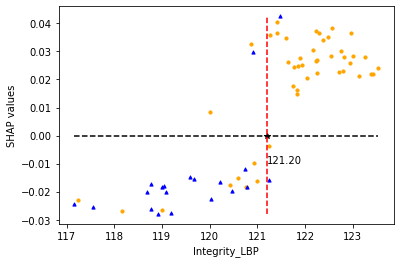

Model AUC [0.94666667 0.         0.         0.        ]
Mean accuracy:  0.8648351648351648
['CIE', 'V-MCI']
Category:  nabm
1 100
(89, 1)


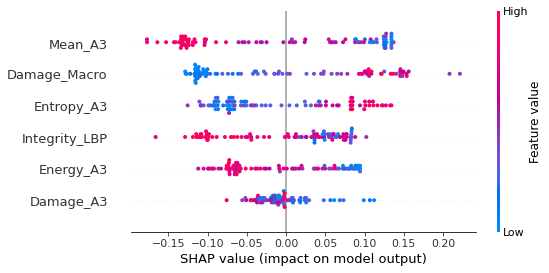

        col_name  feature_importance_vals
0        Mean_A3             3.178122e-14
1   Damage_Macro             2.170464e-14
2     Entropy_A3             1.838980e-14
3  Integrity_LBP             1.398393e-14
4      Energy_A3             1.385686e-14
5      Damage_A3             5.234311e-15
Mean_A3
(89,)
(89,)
(89, 1)


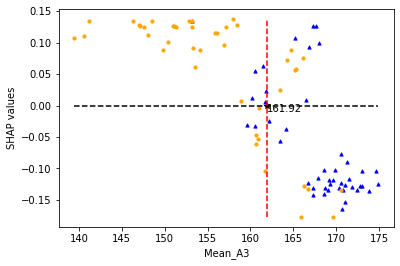

Model AUC [0.88626543 0.         0.         0.        ]
Mean accuracy:  0.7875816993464053
Category:  bst
1 100
(89, 1)


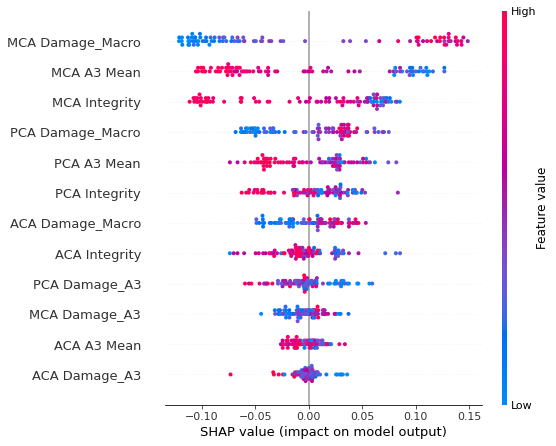

            col_name  feature_importance_vals
0        MCA A3 Mean             1.493364e-14
1   MCA Damage_Macro             1.468313e-14
2      MCA Integrity             8.798192e-15
3        PCA A3 Mean             6.901164e-15
4   PCA Damage_Macro             5.381546e-15
5   ACA Damage_Macro             4.426716e-15
6      ACA Integrity             3.454461e-15
7      PCA Integrity             3.425320e-15
8      PCA Damage_A3             2.988115e-15
9      MCA Damage_A3             1.806687e-15
10       ACA A3 Mean             1.518642e-15
11     ACA Damage_A3             1.343997e-15
MCA A3 Mean
(89,)
(89,)
(89, 1)


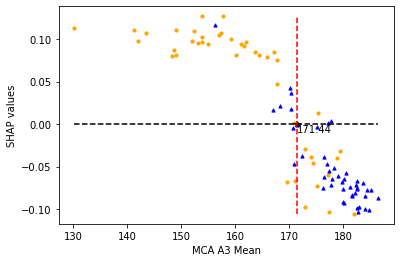

Model AUC [0.87015432 0.         0.         0.        ]
Mean accuracy:  0.7084967320261438
Category:  penumbra
1 100
(89, 1)


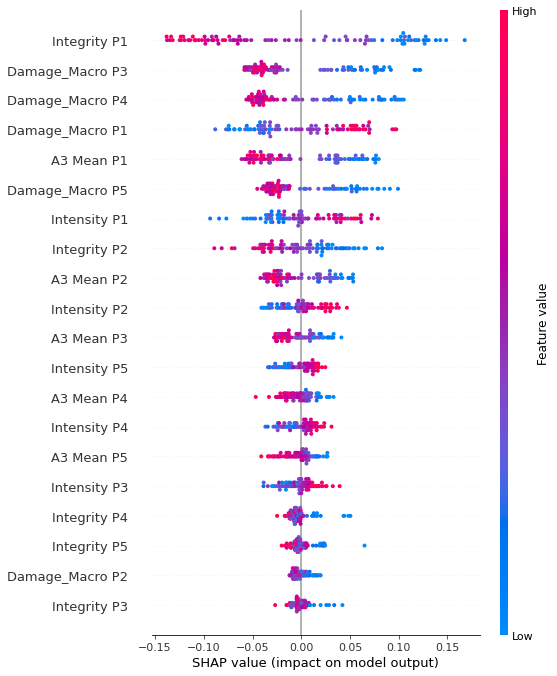

           col_name  feature_importance_vals
0      Integrity P1             1.798735e-14
1   Damage_Macro P4             6.915150e-15
2   Damage_Macro P3             6.814861e-15
3   Damage_Macro P1             5.871253e-15
4   Damage_Macro P5             5.367668e-15
5        A3 Mean P1             4.758563e-15
6      Integrity P2             4.335304e-15
7      Intensity P1             3.925735e-15
8        A3 Mean P2             3.185372e-15
9        A3 Mean P3             1.663410e-15
10     Intensity P2             1.553553e-15
11     Intensity P5             1.230353e-15
12       A3 Mean P4             1.034776e-15
13       A3 Mean P5             9.759700e-16
14     Intensity P4             9.517194e-16
15     Intensity P3             8.996337e-16
16     Integrity P4             7.178909e-16
17     Integrity P3             6.068347e-16
18     Integrity P5             5.859994e-16
19  Damage_Macro P2             5.109811e-16
Integrity P1
(89,)
(89,)
(89, 1)


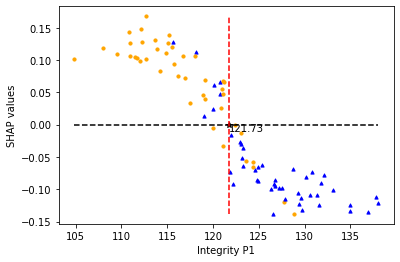

Model AUC [0.95768519 0.         0.         0.        ]
Mean accuracy:  0.8882352941176471
Category:  tract
1 100
(89, 1)


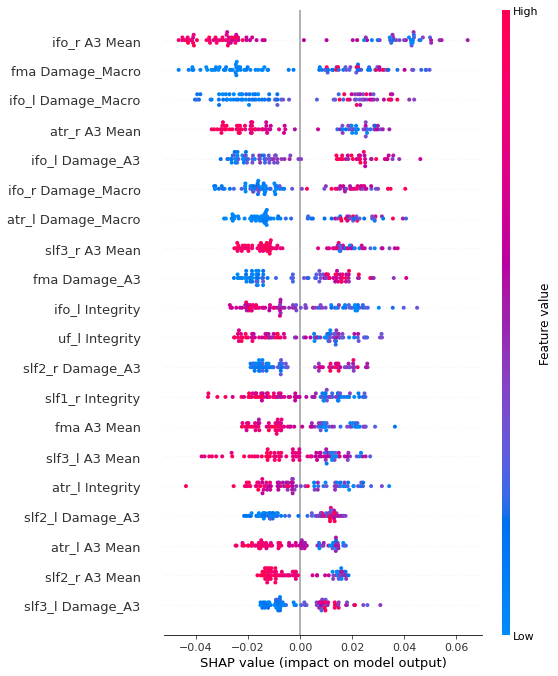

               col_name  feature_importance_vals
0         ifo_r A3 Mean             3.115889e-15
1    ifo_l Damage_Macro             2.626805e-15
2      fma Damage_Macro             2.453550e-15
3       ifo_l Damage_A3             2.101428e-15
4         atr_r A3 Mean             1.782645e-15
..                  ...                      ...
83  slf1_r Damage_Macro             1.609701e-17
84  slf1_l Damage_Macro             1.572686e-17
85       uf_r Damage_A3             1.333653e-17
86      ilf_l Integrity             1.321551e-17
87      cbd_r Damage_A3             1.318915e-17

[88 rows x 2 columns]
ifo_r A3 Mean
(89,)
(89,)
(89, 1)


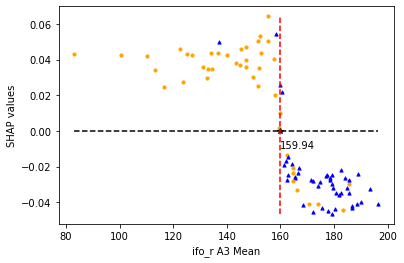

Model AUC [0.94006173 0.         0.         0.        ]
Mean accuracy:  0.8653594771241832
Category:  all
1 100
(89, 1)


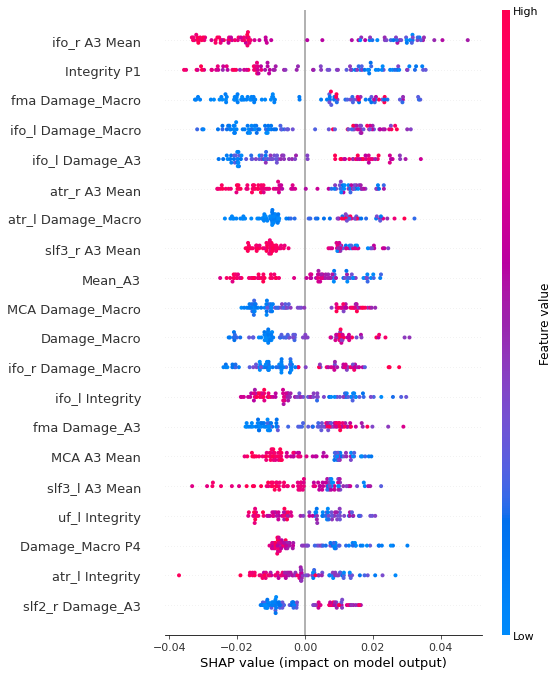

                col_name  feature_importance_vals
0          ifo_r A3 Mean             2.547712e-15
1           Integrity P1             1.574045e-15
2       fma Damage_Macro             1.396127e-15
3        ifo_l Damage_A3             1.144430e-15
4                Mean_A3             1.106374e-15
..                   ...                      ...
121  slf1_l Damage_Macro             8.710887e-18
122       uf_r Damage_A3             7.579674e-18
123      cbd_r Damage_A3             7.375116e-18
124  slf1_r Damage_Macro             6.600081e-18
125      ilf_l Integrity             5.398776e-18

[126 rows x 2 columns]
ifo_r A3 Mean
(89,)
(89,)
(89, 1)


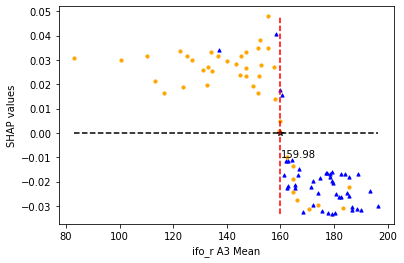

Model AUC [0.93296296 0.         0.         0.        ]
Mean accuracy:  0.8653594771241832
['CIE', 'Mixed']
Category:  nabm
1 100
(67, 1)


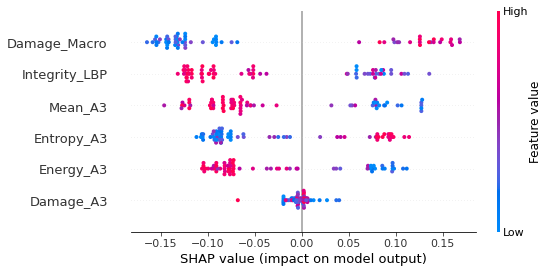

        col_name  feature_importance_vals
0   Damage_Macro             1.641048e-14
1        Mean_A3             1.145091e-14
2  Integrity_LBP             1.004405e-14
3     Entropy_A3             9.781238e-15
4      Energy_A3             9.612103e-15
5      Damage_A3             9.998377e-16
Damage_Macro
(67,)
(67,)
(67, 1)


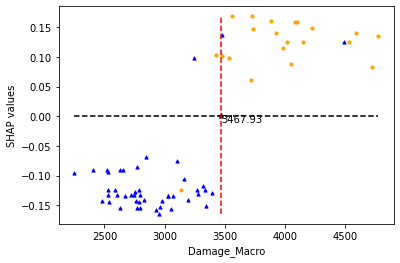

Model AUC [0.96666667 0.         0.         0.        ]
Mean accuracy:  0.9406593406593406
Category:  bst
1 100
(67, 1)


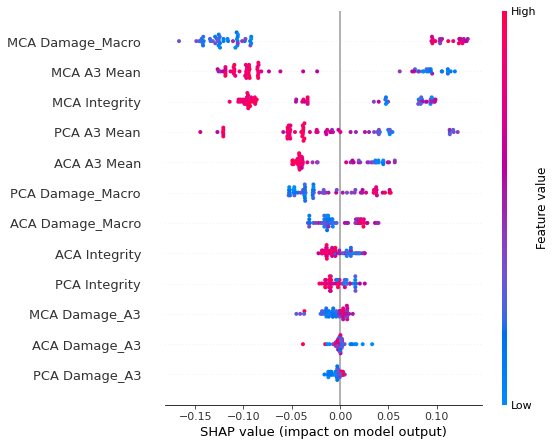

            col_name  feature_importance_vals
0   MCA Damage_Macro             9.915679e-15
1      MCA Integrity             7.920747e-15
2        MCA A3 Mean             6.385517e-15
3        PCA A3 Mean             6.109588e-15
4        ACA A3 Mean             4.173745e-15
5   PCA Damage_Macro             3.049210e-15
6   ACA Damage_Macro             1.467142e-15
7      ACA Integrity             8.522371e-16
8      MCA Damage_A3             7.230002e-16
9      PCA Integrity             5.336443e-16
10     ACA Damage_A3             3.775764e-16
11     PCA Damage_A3             1.586560e-16
MCA Damage_Macro
(67,)
(67,)
(67, 1)


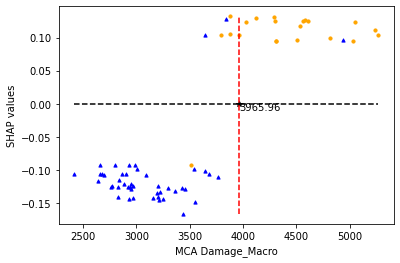

Model AUC [0.95777778 0.         0.         0.        ]
Mean accuracy:  0.9406593406593406
Category:  penumbra
1 100
(67, 1)


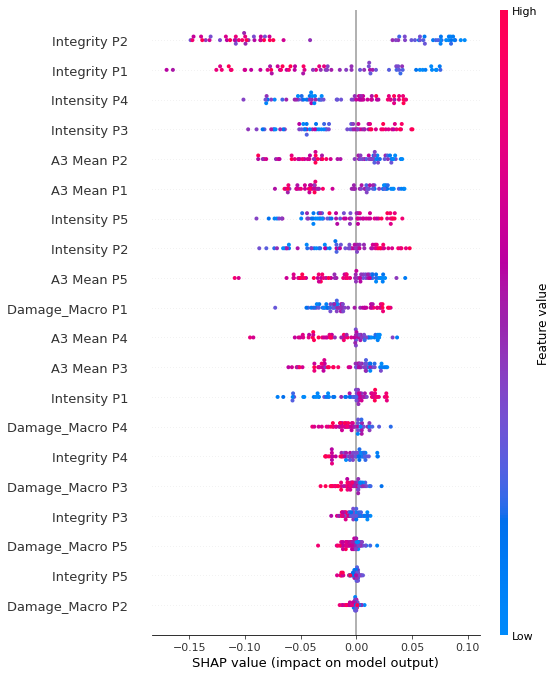

           col_name  feature_importance_vals
0      Integrity P2             1.196612e-14
1      Integrity P1             5.839513e-15
2      Intensity P3             4.694162e-15
3      Intensity P4             3.840095e-15
4        A3 Mean P2             2.818058e-15
5      Intensity P5             2.725535e-15
6        A3 Mean P1             2.561644e-15
7      Intensity P2             2.490954e-15
8        A3 Mean P5             2.066577e-15
9   Damage_Macro P1             1.570358e-15
10     Intensity P1             1.528373e-15
11       A3 Mean P3             1.414450e-15
12       A3 Mean P4             1.362617e-15
13  Damage_Macro P4             7.614081e-16
14     Integrity P4             5.166359e-16
15  Damage_Macro P3             4.123526e-16
16     Integrity P3             3.379187e-16
17  Damage_Macro P5             2.743167e-16
18     Integrity P5             1.466731e-16
19  Damage_Macro P2             9.067572e-17
Integrity P2
(67,)
(67,)
(67, 1)


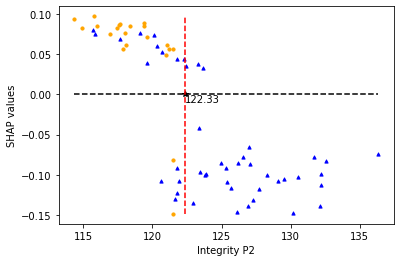

Model AUC [0.93611111 0.         0.         0.        ]
Mean accuracy:  0.867032967032967
Category:  tract
1 100
(67, 1)


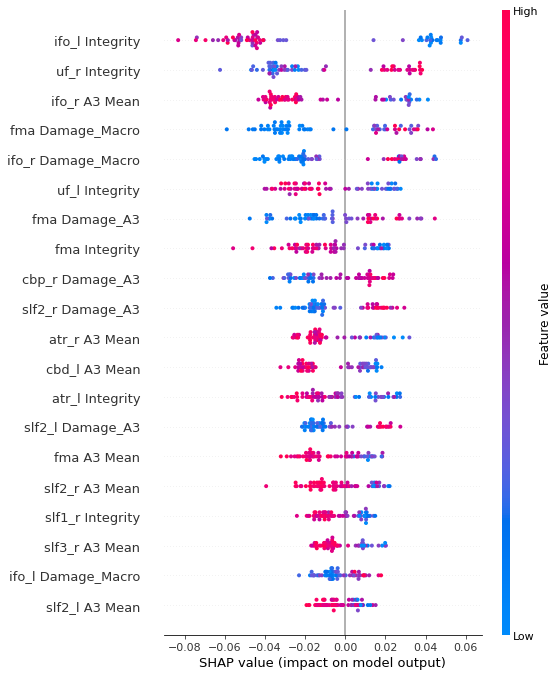

              col_name  feature_importance_vals
0      ifo_l Integrity             2.921274e-15
1        ifo_r A3 Mean             2.059550e-15
2       uf_r Integrity             1.823194e-15
3     fma Damage_Macro             1.675255e-15
4   ifo_r Damage_Macro             1.456300e-15
..                 ...                      ...
83     cbd_r Damage_A3             7.647013e-18
84    slf1_l Integrity             6.479802e-18
85     atr_r Integrity             5.929231e-18
86    slf2_l Integrity             5.325296e-18
87     ilf_r Integrity             2.818608e-18

[88 rows x 2 columns]
ifo_l Integrity
(67,)
(67,)
(67, 1)


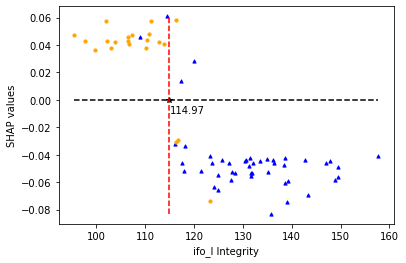

Model AUC [0.96888889 0.         0.         0.        ]
Mean accuracy:  0.9714285714285715
Category:  all
1 100
(67, 1)


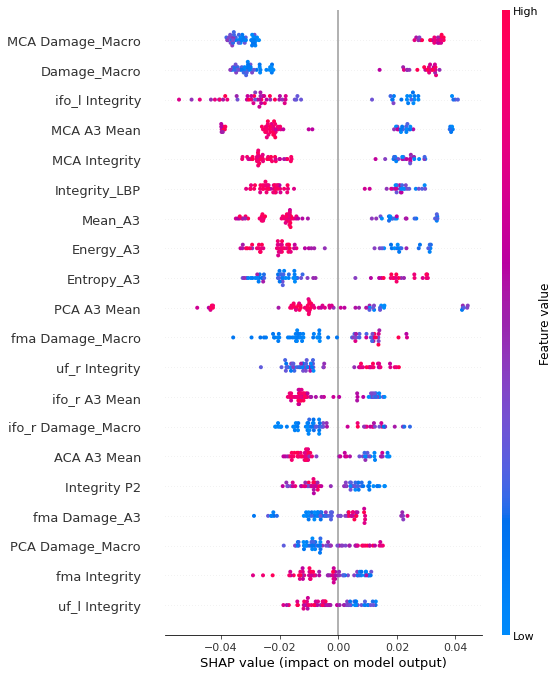

                col_name  feature_importance_vals
0           Damage_Macro             1.577731e-15
1       MCA Damage_Macro             1.495332e-15
2          Integrity_LBP             1.226449e-15
3          MCA Integrity             1.206500e-15
4             Entropy_A3             1.020451e-15
..                   ...                      ...
121      cbd_r Damage_A3             2.509759e-18
122   cst_r Damage_Macro             2.286565e-18
123  slf1_l Damage_Macro             2.160675e-18
124    uf_r Damage_Macro             2.081531e-18
125      ilf_r Integrity             1.514071e-18

[126 rows x 2 columns]
Damage_Macro
(67,)
(67,)
(67, 1)


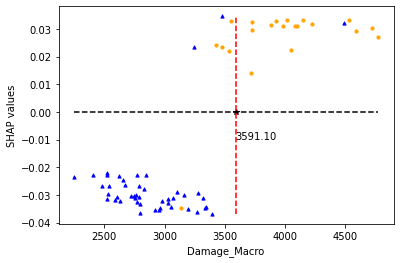

Model AUC [0.96888889 0.         0.         0.        ]
Mean accuracy:  0.9406593406593406
['Mixed', 'AD']
Category:  nabm
1 100
(41, 1)


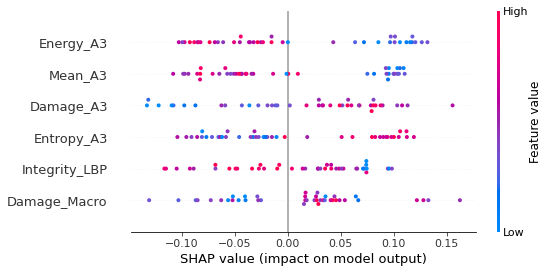

        col_name  feature_importance_vals
0        Mean_A3             2.073802e-14
1      Energy_A3             1.966207e-14
2     Entropy_A3             1.884777e-14
3  Integrity_LBP             1.068893e-14
4      Damage_A3             7.720278e-15
5   Damage_Macro             6.208575e-15
Mean_A3
(41,)
(41,)
(41, 1)


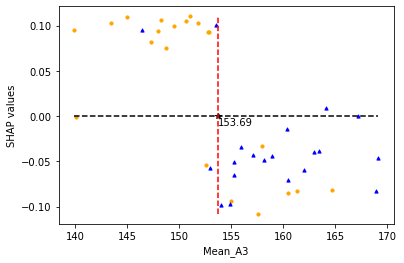

Model AUC [0.785 0.    0.    0.   ]
Mean accuracy:  0.7777777777777778
Category:  bst
1 100
(41, 1)


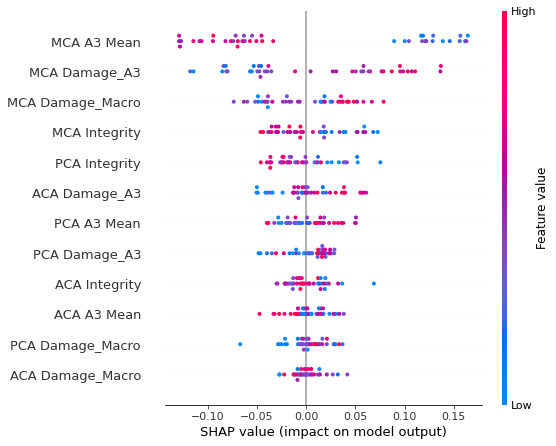

            col_name  feature_importance_vals
0        MCA A3 Mean             1.443290e-14
1      MCA Damage_A3             5.689026e-15
2   MCA Damage_Macro             2.978954e-15
3      MCA Integrity             2.730021e-15
4      PCA Integrity             2.338434e-15
5      ACA Integrity             1.612968e-15
6      ACA Damage_A3             1.476138e-15
7      PCA Damage_A3             1.403174e-15
8   PCA Damage_Macro             1.186957e-15
9        PCA A3 Mean             1.092713e-15
10       ACA A3 Mean             1.052164e-15
11  ACA Damage_Macro             7.462225e-16
MCA A3 Mean
(41,)
(41,)
(41, 1)


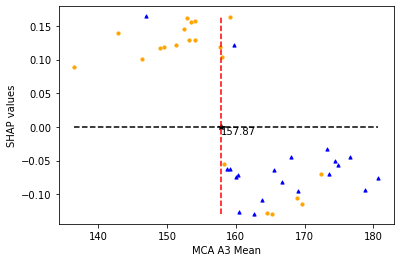

Model AUC [0.77 0.   0.   0.  ]
Mean accuracy:  0.6555555555555556
Category:  penumbra
1 100
(41, 1)


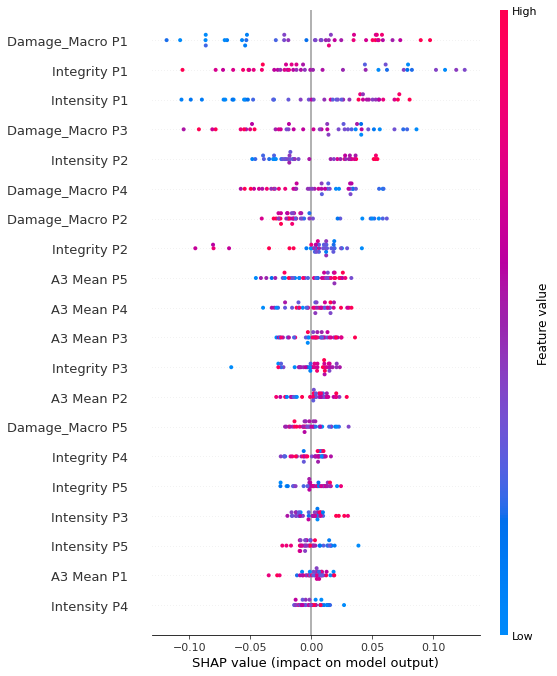

           col_name  feature_importance_vals
0      Intensity P1             3.750472e-15
1      Integrity P1             3.360810e-15
2   Damage_Macro P1             3.051379e-15
3   Damage_Macro P3             2.808192e-15
4      Intensity P2             1.592801e-15
5   Damage_Macro P4             1.545476e-15
6   Damage_Macro P2             1.331400e-15
7        A3 Mean P5             8.376546e-16
8      Integrity P2             8.165635e-16
9        A3 Mean P4             6.702538e-16
10     Integrity P3             6.589781e-16
11     Integrity P5             5.039101e-16
12  Damage_Macro P5             4.549516e-16
13       A3 Mean P3             4.227304e-16
14       A3 Mean P2             4.213210e-16
15     Intensity P3             3.982817e-16
16     Intensity P5             3.930504e-16
17     Integrity P4             3.349101e-16
18       A3 Mean P1             3.168039e-16
19     Intensity P4             2.540692e-16
Intensity P1
(41,)
(41,)
(41, 1)


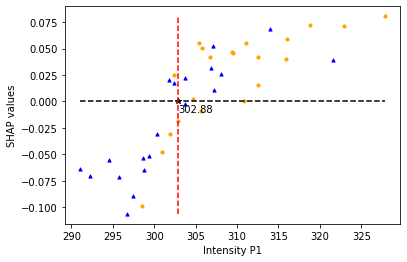

Model AUC [0.8325 0.     0.     0.    ]
Mean accuracy:  0.7138888888888889
Category:  tract
1 100
(41, 1)


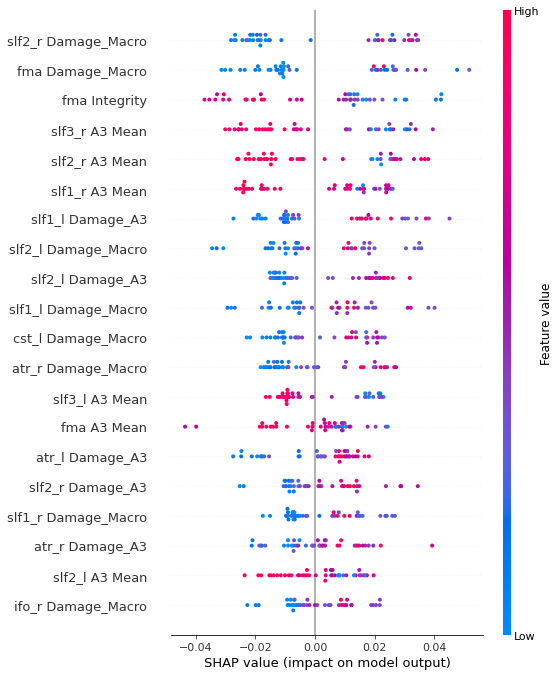

               col_name  feature_importance_vals
0   slf2_r Damage_Macro             1.024354e-15
1      slf1_l Damage_A3             7.923349e-16
2      fma Damage_Macro             7.580742e-16
3        slf3_r A3 Mean             7.359564e-16
4   slf2_l Damage_Macro             6.813126e-16
..                  ...                      ...
83      cbp_l Integrity             8.649900e-18
84   cbp_l Damage_Macro             7.298036e-18
85      atr_r Integrity             6.406957e-18
86      ilf_l Damage_A3             6.095249e-18
87   ilf_l Damage_Macro             5.480727e-18

[88 rows x 2 columns]
slf2_r Damage_Macro
(41,)
(41,)
(41, 1)


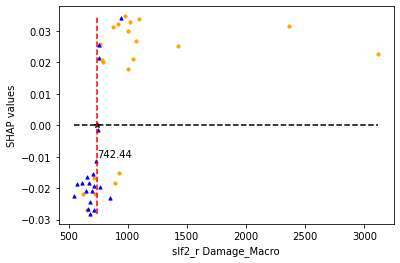

Model AUC [0.83 0.   0.   0.  ]
Mean accuracy:  0.8055555555555556
Category:  all
1 100
(41, 1)


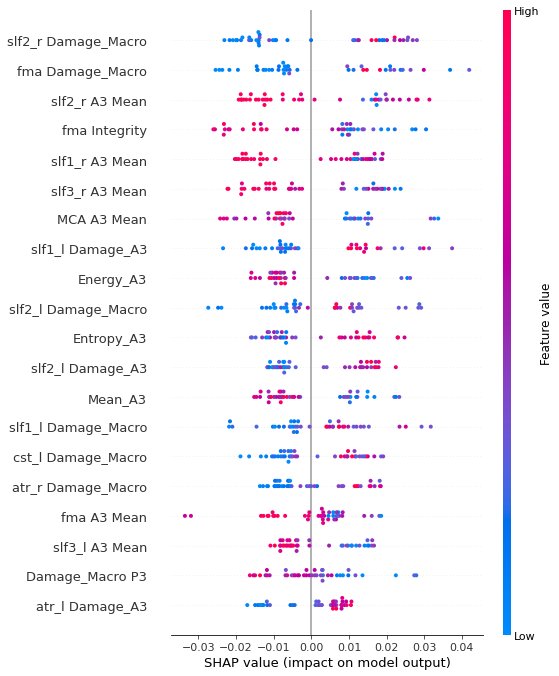

                col_name  feature_importance_vals
0    slf2_r Damage_Macro             7.762413e-16
1         slf2_r A3 Mean             4.987330e-16
2       fma Damage_Macro             4.833373e-16
3         slf1_r A3 Mean             4.722785e-16
4         slf3_r A3 Mean             4.657733e-16
..                   ...                      ...
121          PCA A3 Mean             4.396948e-18
122    uf_r Damage_Macro             4.335115e-18
123        ilf_l A3 Mean             4.166555e-18
124          fmi A3 Mean             4.004772e-18
125      ilf_l Damage_A3             3.255995e-18

[126 rows x 2 columns]
slf2_r Damage_Macro
(41,)
(41,)
(41, 1)


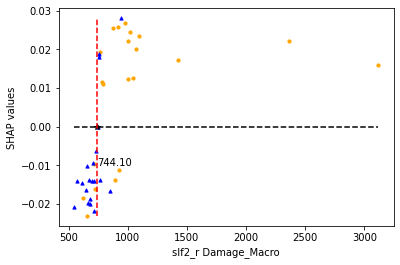

Model AUC [0.82 0.   0.   0.  ]
Mean accuracy:  0.8055555555555556
['V-MCI', 'AD']
Category:  nabm
1 100
(63, 1)


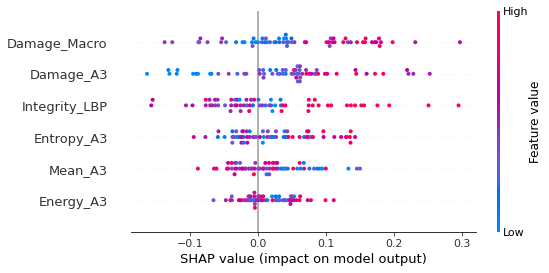

        col_name  feature_importance_vals
0   Damage_Macro             3.718746e-14
1      Damage_A3             3.698832e-14
2  Integrity_LBP             2.056572e-14
3     Entropy_A3             1.943454e-14
4        Mean_A3             1.190947e-14
5      Energy_A3             8.735092e-15
Damage_Macro
(63,)
(63,)
(63, 1)


posx and posy should be finite values
posx and posy should be finite values


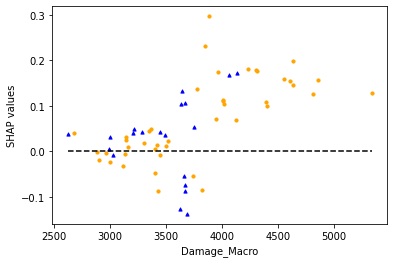

Model AUC [0.56041667 0.         0.         0.        ]
Mean accuracy:  0.6192307692307693
Category:  bst
1 100
(63, 1)


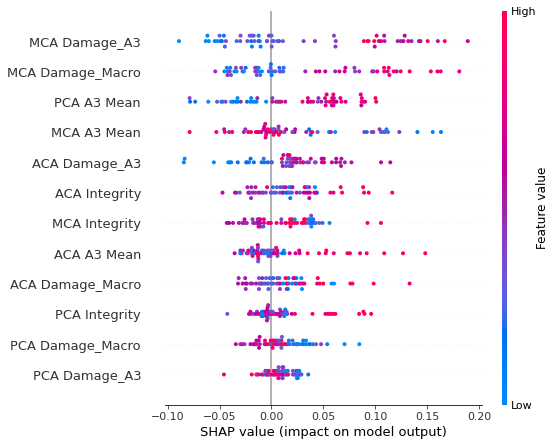

            col_name  feature_importance_vals
0      MCA Damage_A3             1.494593e-14
1        PCA A3 Mean             6.372290e-15
2   MCA Damage_Macro             6.167570e-15
3        MCA A3 Mean             5.931941e-15
4      ACA Damage_A3             4.743791e-15
5      MCA Integrity             4.481170e-15
6        ACA A3 Mean             3.133588e-15
7   ACA Damage_Macro             2.997846e-15
8      ACA Integrity             2.992032e-15
9   PCA Damage_Macro             2.679118e-15
10     PCA Integrity             2.110779e-15
11     PCA Damage_A3             1.298657e-15
MCA Damage_A3
(63,)
(63,)
(63, 1)


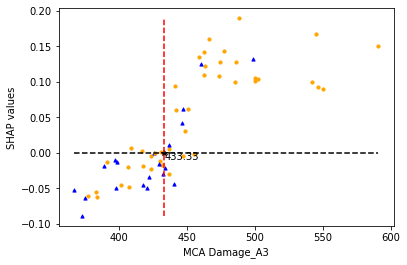

Model AUC [0.65347222 0.         0.         0.        ]
Mean accuracy:  0.7307692307692307
Category:  penumbra
1 100
(63, 1)


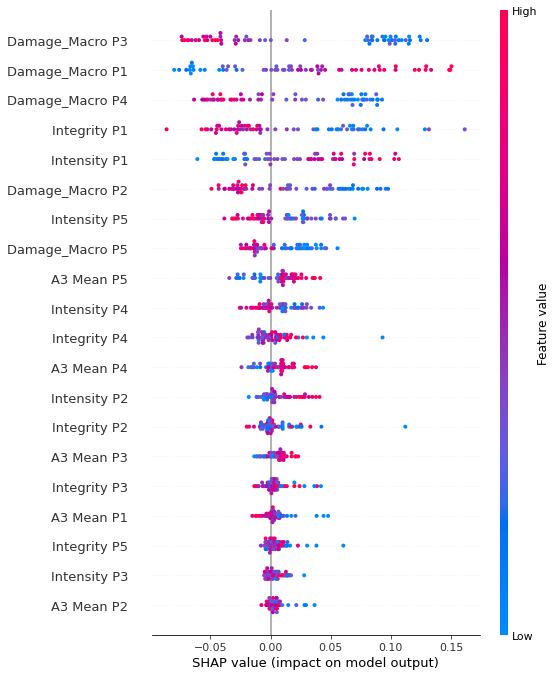

           col_name  feature_importance_vals
0   Damage_Macro P3             7.572190e-15
1   Damage_Macro P1             6.439348e-15
2   Damage_Macro P4             5.564451e-15
3   Damage_Macro P2             4.767616e-15
4      Integrity P1             4.523942e-15
5      Intensity P1             3.736594e-15
6   Damage_Macro P5             1.642783e-15
7      Intensity P5             1.561305e-15
8        A3 Mean P5             1.164460e-15
9      Intensity P4             9.341486e-16
10     Integrity P4             8.387930e-16
11       A3 Mean P4             7.798327e-16
12     Integrity P2             6.575983e-16
13     Intensity P2             5.480922e-16
14     Integrity P3             5.045470e-16
15       A3 Mean P3             4.376653e-16
16     Integrity P5             4.247362e-16
17       A3 Mean P1             3.806227e-16
18     Intensity P3             3.625979e-16
19       A3 Mean P2             2.224715e-16
Damage_Macro P3
(63,)
(63,)
(63, 1)


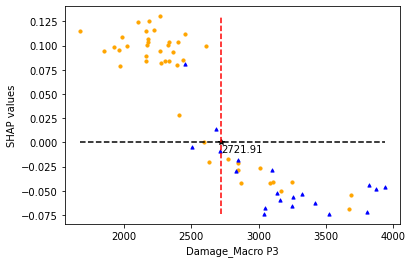

Model AUC [0.88472222 0.         0.         0.        ]
Mean accuracy:  0.7935897435897437
Category:  tract
1 100
(63, 1)


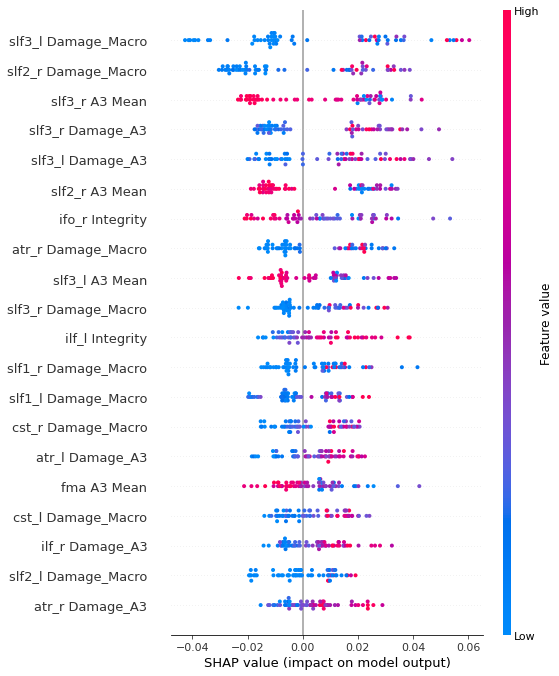

               col_name  feature_importance_vals
0   slf3_l Damage_Macro             1.283045e-15
1   slf2_r Damage_Macro             1.074553e-15
2      slf3_l Damage_A3             9.749349e-16
3        slf3_r A3 Mean             8.836248e-16
4      slf3_r Damage_A3             8.031770e-16
..                  ...                      ...
83      cst_r Damage_A3             2.154026e-17
84      cbp_r Damage_A3             1.989511e-17
85      cbp_r Integrity             1.831624e-17
86          fmi A3 Mean             1.831285e-17
87      cbp_l Damage_A3             1.514495e-17

[88 rows x 2 columns]
slf3_l Damage_Macro
(63,)
(63,)
(63, 1)


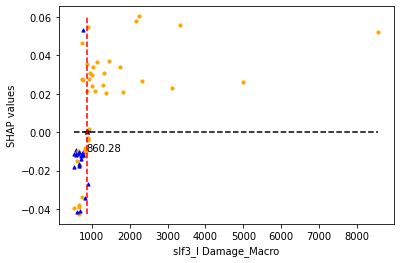

Model AUC [0.85347222 0.         0.         0.        ]
Mean accuracy:  0.7269230769230769
Category:  all
1 100
(63, 1)


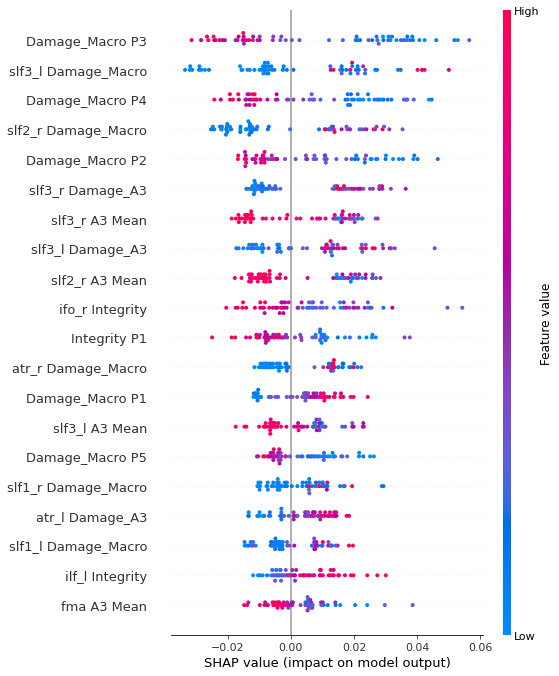

                col_name  feature_importance_vals
0        Damage_Macro P3             1.150582e-15
1        Damage_Macro P4             6.680854e-16
2       slf3_l Damage_A3             6.552105e-16
3    slf2_r Damage_Macro             6.093352e-16
4         slf3_r A3 Mean             6.082374e-16
..                   ...                      ...
121       uf_r Damage_A3             1.050067e-17
122        PCA Damage_A3             1.034058e-17
123   cbp_l Damage_Macro             9.134403e-18
124      cbp_l Damage_A3             8.706546e-18
125          fmi A3 Mean             7.136041e-18

[126 rows x 2 columns]
Damage_Macro P3
(63,)
(63,)
(63, 1)


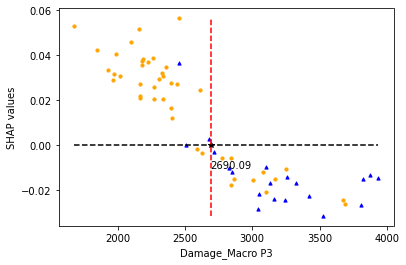

Model AUC [0.89444444 0.         0.         0.        ]
Mean accuracy:  0.7769230769230769
['V-MCI', 'MCI']
Category:  nabm
1 100
(107, 1)


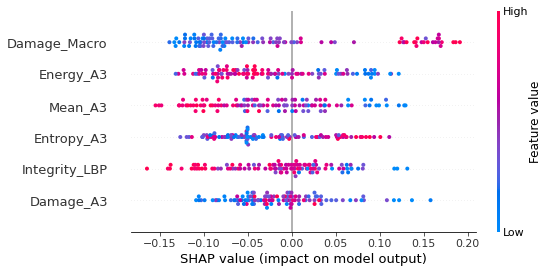

        col_name  feature_importance_vals
0   Damage_Macro             6.253499e-14
1      Energy_A3             3.234758e-14
2        Mean_A3             2.293098e-14
3     Entropy_A3             2.261429e-14
4  Integrity_LBP             1.977861e-14
5      Damage_A3             1.561428e-14
Damage_Macro
(107,)
(107,)
(107, 1)


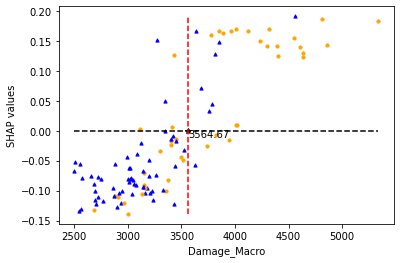

Model AUC [0.66374644 0.         0.         0.        ]
Mean accuracy:  0.6186147186147186
Category:  bst
1 100
(107, 1)


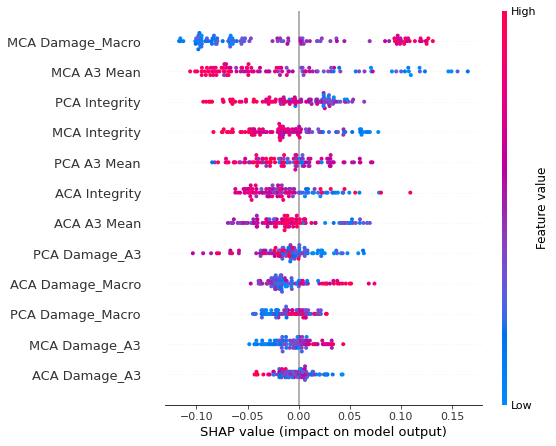

            col_name  feature_importance_vals
0   MCA Damage_Macro             2.772088e-14
1        MCA A3 Mean             1.938055e-14
2      ACA Integrity             1.032689e-14
3      PCA Integrity             8.834350e-15
4        ACA A3 Mean             8.428533e-15
5        PCA A3 Mean             7.356474e-15
6      MCA Integrity             6.820418e-15
7      PCA Damage_A3             5.651041e-15
8   ACA Damage_Macro             5.268958e-15
9   PCA Damage_Macro             4.810280e-15
10     MCA Damage_A3             3.682452e-15
11     ACA Damage_A3             3.503111e-15
MCA Damage_Macro
(107,)
(107,)
(107, 1)


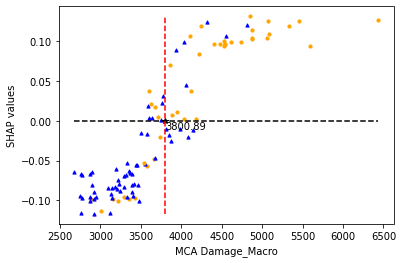

Model AUC [0.77663818 0.         0.         0.        ]
Mean accuracy:  0.7558441558441559
Category:  penumbra
1 100
(107, 1)


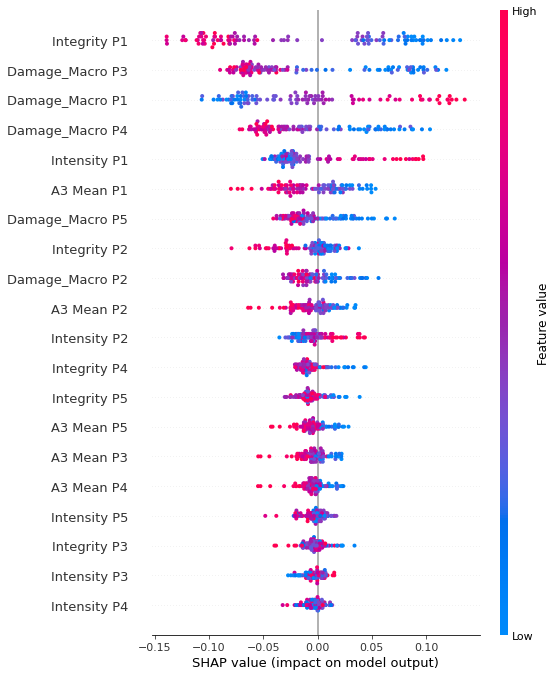

           col_name  feature_importance_vals
0      Integrity P1             2.457583e-14
1   Damage_Macro P1             1.374308e-14
2   Damage_Macro P4             9.916520e-15
3   Damage_Macro P3             9.833443e-15
4      Intensity P1             5.903887e-15
5        A3 Mean P1             4.402295e-15
6      Integrity P2             3.425916e-15
7   Damage_Macro P2             3.369883e-15
8   Damage_Macro P5             3.234367e-15
9        A3 Mean P2             2.493594e-15
10     Intensity P2             2.365011e-15
11     Integrity P4             1.973004e-15
12       A3 Mean P5             1.638812e-15
13       A3 Mean P3             1.599252e-15
14     Integrity P5             1.501180e-15
15       A3 Mean P4             1.399061e-15
16     Intensity P5             1.299782e-15
17     Integrity P3             1.176661e-15
18     Intensity P3             9.647468e-16
19     Intensity P4             9.221148e-16
Integrity P1
(107,)
(107,)
(107, 1)


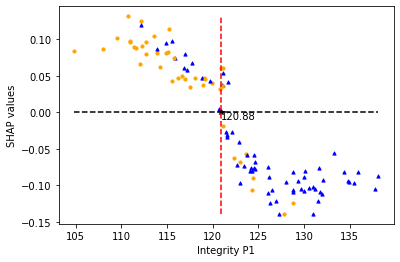

Model AUC [0.89038462 0.         0.         0.        ]
Mean accuracy:  0.841125541125541
Category:  tract
1 100
(107, 1)


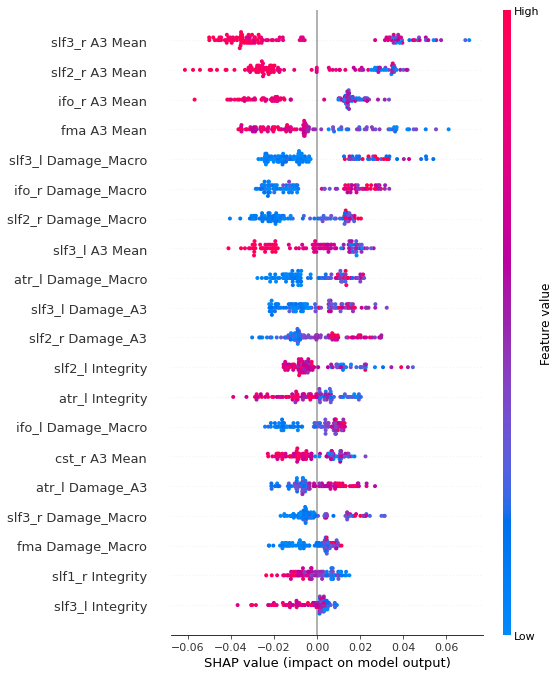

               col_name  feature_importance_vals
0        slf3_r A3 Mean             4.947865e-15
1        slf2_r A3 Mean             4.189323e-15
2           fma A3 Mean             2.844404e-15
3         ifo_r A3 Mean             2.816757e-15
4   slf3_l Damage_Macro             2.339058e-15
..                  ...                      ...
83         uf_l A3 Mean             7.133246e-17
84    uf_r Damage_Macro             7.045789e-17
85      cst_r Damage_A3             6.469807e-17
86        cbp_l A3 Mean             5.953329e-17
87      ilf_l Integrity             5.238242e-17

[88 rows x 2 columns]
slf3_r A3 Mean
(107,)
(107,)
(107, 1)


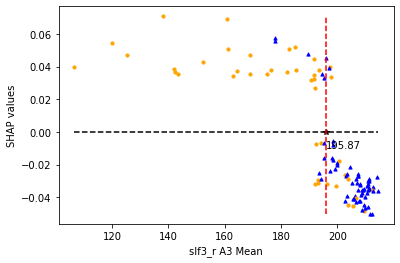

Model AUC [0.87905983 0.         0.         0.        ]
Mean accuracy:  0.7748917748917749
Category:  all
1 100
(107, 1)


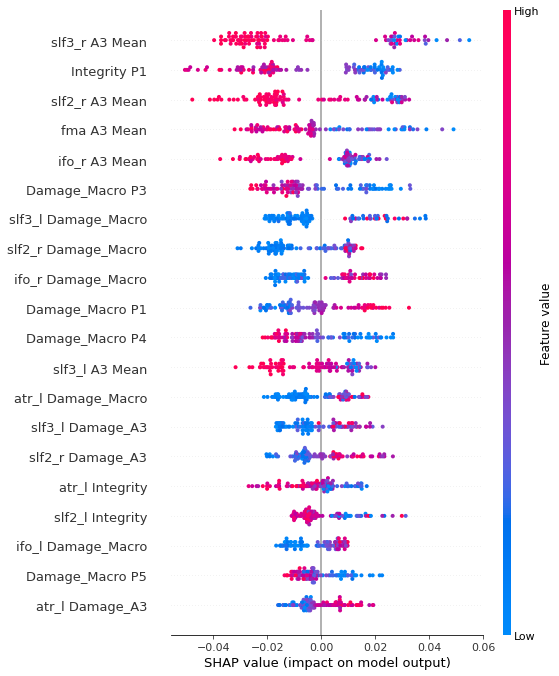

            col_name  feature_importance_vals
0     slf3_r A3 Mean             4.057518e-15
1     slf2_r A3 Mean             2.937646e-15
2       Integrity P1             2.520987e-15
3        fma A3 Mean             2.117691e-15
4      ifo_r A3 Mean             1.773755e-15
..               ...                      ...
121    MCA Damage_A3             3.578121e-17
122   uf_r Damage_A3             3.415745e-17
123    cbp_l A3 Mean             3.411002e-17
124  ifo_r Damage_A3             3.119665e-17
125    ACA Damage_A3             2.865555e-17

[126 rows x 2 columns]
slf3_r A3 Mean
(107,)
(107,)
(107, 1)


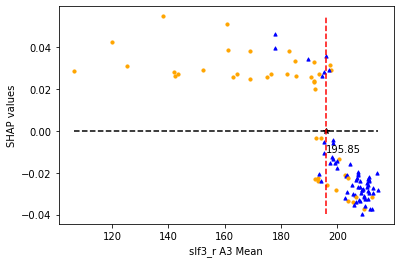

Model AUC [0.89166667 0.         0.         0.        ]
Mean accuracy:  0.7567099567099567
['V-MCI', 'Mixed']
Category:  nabm
1 100
(64, 1)


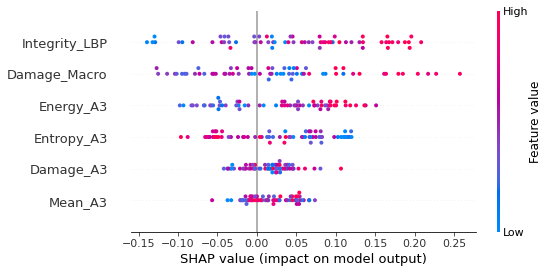

        col_name  feature_importance_vals
0  Integrity_LBP             3.122871e-14
1   Damage_Macro             2.789869e-14
2     Entropy_A3             1.946165e-14
3      Energy_A3             1.905203e-14
4        Mean_A3             7.450417e-15
5      Damage_A3             6.726607e-15
Integrity_LBP
(64,)
(64,)
(64, 1)


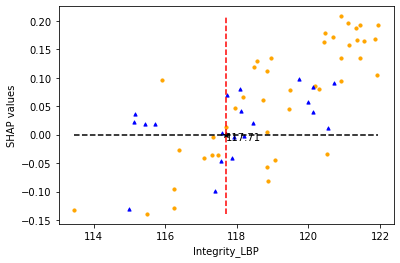

Model AUC [0.64222222 0.         0.         0.        ]
Mean accuracy:  0.6884615384615385
Category:  bst
1 100
(64, 1)


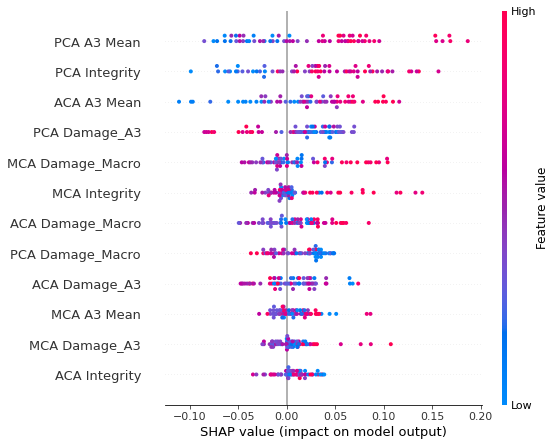

            col_name  feature_importance_vals
0        PCA A3 Mean             1.163585e-14
1      PCA Integrity             1.004145e-14
2        ACA A3 Mean             7.053819e-15
3      PCA Damage_A3             5.470450e-15
4      MCA Integrity             4.857524e-15
5   MCA Damage_Macro             4.266932e-15
6   ACA Damage_Macro             3.122340e-15
7      ACA Damage_A3             3.071545e-15
8   PCA Damage_Macro             2.983074e-15
9        MCA A3 Mean             1.662895e-15
10     ACA Integrity             1.378319e-15
11     MCA Damage_A3             1.363862e-15
PCA A3 Mean
(64,)
(64,)
(64, 1)


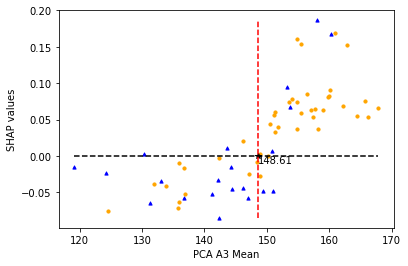

Model AUC [0.67708333 0.         0.         0.        ]
Mean accuracy:  0.6538461538461539
Category:  penumbra
1 100
(64, 1)


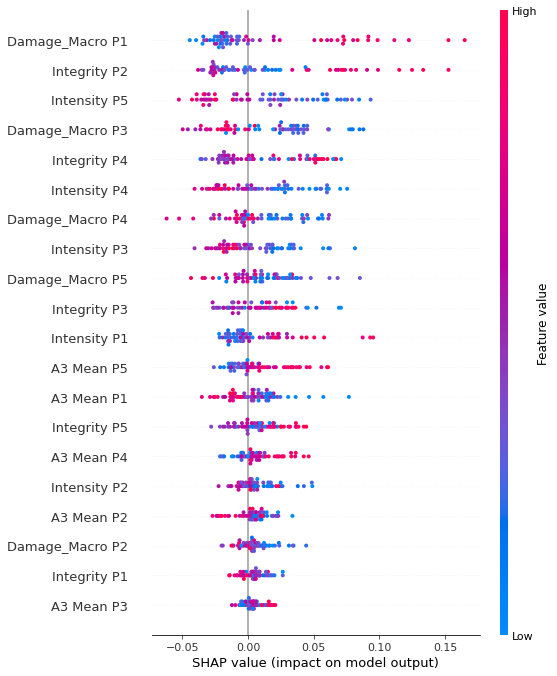

           col_name  feature_importance_vals
0      Integrity P2             4.593683e-15
1   Damage_Macro P1             4.465185e-15
2   Damage_Macro P3             3.941509e-15
3      Intensity P5             3.747518e-15
4      Intensity P4             3.074337e-15
5      Integrity P4             2.978412e-15
6   Damage_Macro P4             2.124819e-15
7   Damage_Macro P5             2.088783e-15
8      Intensity P3             2.067248e-15
9      Integrity P3             1.924513e-15
10       A3 Mean P5             1.459719e-15
11       A3 Mean P1             1.230637e-15
12  Damage_Macro P2             1.211975e-15
13     Integrity P5             1.185087e-15
14     Intensity P2             1.027824e-15
15     Intensity P1             9.790075e-16
16       A3 Mean P4             9.033064e-16
17       A3 Mean P2             8.014151e-16
18     Integrity P1             5.421011e-16
19       A3 Mean P3             5.213657e-16
Integrity P2
(64,)
(64,)
(64, 1)


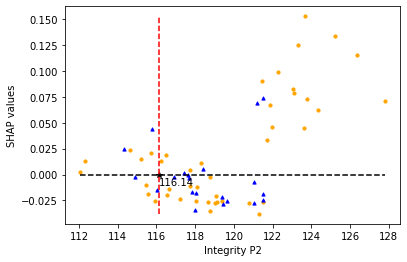

Model AUC [0.65180556 0.         0.         0.        ]
Mean accuracy:  0.6397435897435898
Category:  tract
1 100
(64, 1)


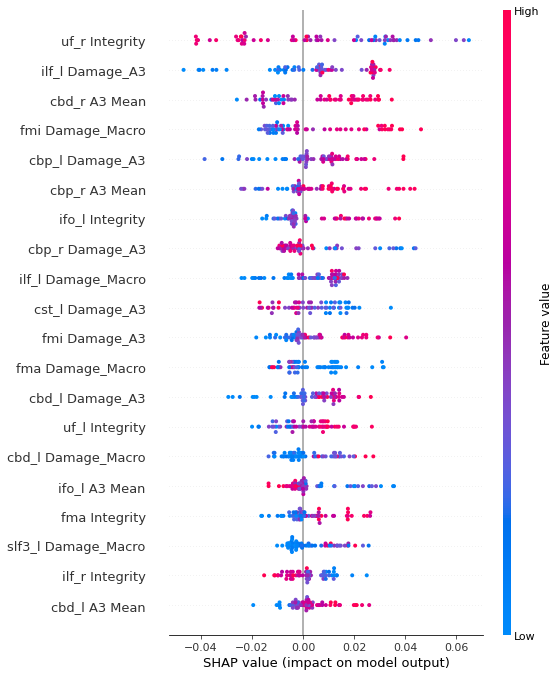

               col_name  feature_importance_vals
0        uf_r Integrity             1.731091e-15
1       ilf_l Damage_A3             1.376110e-15
2      fmi Damage_Macro             1.044954e-15
3       cbp_l Damage_A3             8.636077e-16
4         cbd_r A3 Mean             7.125377e-16
..                  ...                      ...
83  slf3_r Damage_Macro             5.228819e-17
84     slf1_r Integrity             5.121458e-17
85    uf_r Damage_Macro             4.764899e-17
86  slf2_r Damage_Macro             4.441375e-17
87  slf1_r Damage_Macro             4.099004e-17

[88 rows x 2 columns]
uf_r Integrity
(64,)
(64,)
(64, 1)


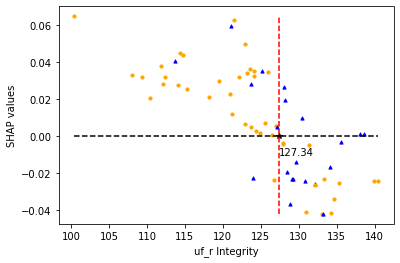

Model AUC [0.59569444 0.         0.         0.        ]
Mean accuracy:  0.717948717948718
Category:  all
1 100
(64, 1)


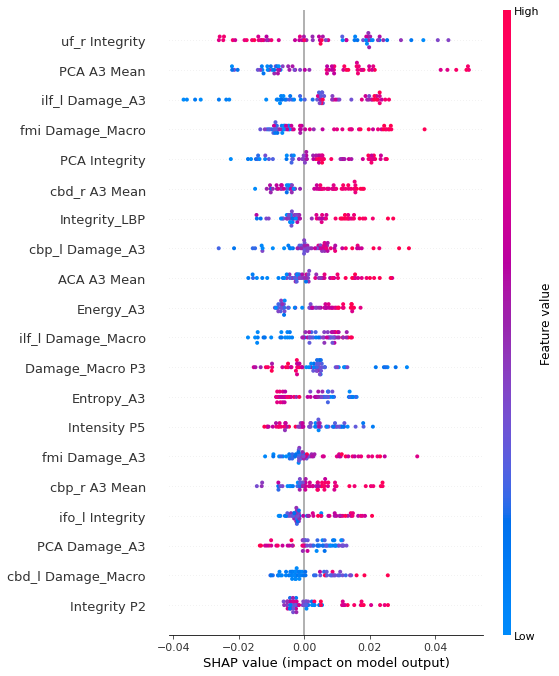

              col_name  feature_importance_vals
0      ilf_l Damage_A3             9.753212e-16
1       uf_r Integrity             8.286930e-16
2          PCA A3 Mean             7.268762e-16
3        PCA Integrity             5.004406e-16
4          ACA A3 Mean             4.349277e-16
..                 ...                      ...
121    atr_l Integrity             2.634611e-17
122    cbp_l Integrity             2.583789e-17
123   slf1_r Integrity             2.278519e-17
124  uf_r Damage_Macro             2.124697e-17
125         A3 Mean P2             2.011026e-17

[126 rows x 2 columns]
ilf_l Damage_A3
(64,)
(64,)
(64, 1)


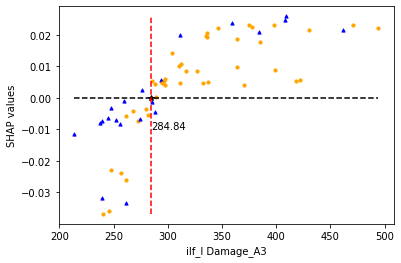

Model AUC [0.7075 0.     0.     0.    ]
Mean accuracy:  0.6564102564102563


In [5]:
from utils import plot_roc_curve

dataset='CCNA'
# Experiment Directory
exp_path = "C:/Users/kchan/Documents/Biomarker Pipeline/RegionalAnalysis/"+dataset+"/experiment2_3_anova/"
featurelist = ['nabm','bst','penumbra','tract','all']
groups = [['CIE','MCI'],
          ['CIE','AD'],
         ['CIE','V-MCI'],
         ['CIE','Mixed'],
         ['Mixed','AD'],
            ['V-MCI','AD'],
         ['V-MCI','MCI'],
         ['V-MCI','Mixed']]

model_accuracy = np.zeros([len(featurelist),len(groups)])
mean_tpr_all = []
feat_importance = []
report_all = {}
auc_all = {}
mean_fpr = np.linspace(0,1,100)

idx = []
for g in range(len(groups)):
    print(groups[g])
    train_labels_new = train_labels

    row = groups[g]
    holder=[]
    for x in row:
        select = np.where(train_labels==x)
        select = np.array(select[0])
        holder.append(list(select))
    
    idx.append(holder)
    train_labels_new = train_labels_new[np.hstack(idx[g])]

    n_classes = len(np.unique(train_labels_new))
    model_auc = np.zeros([1,n_classes*2])
    mean_tpr_feat = []

    k = 0
    for f in featurelist:
        cat = f
        if f=='nabm':
            train_features = df_nabm2.loc[np.hstack(idx[g])]
        elif f=='bst':
            train_features = df_bst2.loc[np.hstack(idx[g])]
        elif f=='penumbra':
            train_features = df_penum2.loc[np.hstack(idx[g])]
        elif f=='tract':
            train_features = df_tract2.loc[np.hstack(idx[g])]
        else:
            train_features = df_all.loc[np.hstack(idx[g])]

        num_feat = train_features.shape[1]
        print('Category: ',f)

        model_path = exp_path + "model_files/" + cat
        # Create output directories
        if(not os.path.isdir(model_path) or not os.listdir(model_path)):
            os.makedirs(model_path + '/models/')
            os.makedirs(model_path + '/figures/')
            os.makedirs(model_path + '/metrics/')

        accuracy,model_auc[0,:],mean_tpr, pred,actual,thresholds=run_models('rf',dataset,train_features,train_labels_new,iterations=5,n_classes=n_classes,cv='cv',show_plots='no')
        filename = model_path+ '/models/model.sav'

        np.save(model_path + '/metrics/accuracy.npy',model_accuracy)
        np.save(model_path + '/metrics/auc.npy',model_auc)

        print("Mean accuracy: ",accuracy)
        model_accuracy[k,g] = accuracy
        report = classification_report(actual,pred,output_dict=True)
        keys = list(report.keys())
        f1 = []
        
        for R in range(len(row)):
            ky = keys[R]
            f1.append(report[ky]['f1-score'])

        
        auc_all[f]={}
        auc_all[f][str(groups[g])]=model_auc
        report_all[f] = {}
        report_all[f][str(groups[g])]=f1
        mean_tpr_feat.append(mean_tpr)

        k+=1

[[0.47272727 0.62727273 0.64545455 0.62727273 0.61818182]
 [0.87912088 0.83406593 0.80769231 0.84945055 0.86483516]
 [0.7875817  0.70849673 0.88823529 0.86535948 0.86535948]
 [0.61861472 0.75584416 0.84112554 0.77489177 0.75670996]
 [0.77777778 0.65555556 0.71388889 0.80555556 0.80555556]
 [0.61923077 0.73076923 0.79358974 0.72692308 0.77692308]
 [0.94065934 0.94065934 0.86703297 0.97142857 0.94065934]
 [0.68846154 0.65384615 0.63974359 0.71794872 0.65641026]]


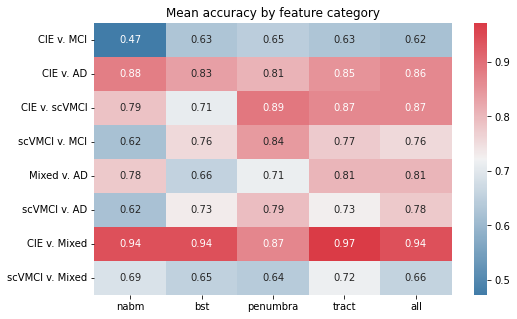

In [14]:
import seaborn as sns
df_index = []
for k in range(len(groups)):
    newstring = groups[k][0]+" v. " +groups[k][1]
    df_index.append(newstring)
acc = np.transpose(model_accuracy)
df_heatmap = pd.DataFrame(data=acc,columns=featurelist,index=df_index)

acc[[3,6]]=acc[[6,3]]
annot_labels =  np.array(["%.2f" % w for w in acc.reshape(acc.size)])
annot_labels = annot_labels.reshape(acc.shape)
cmap = sns.diverging_palette(240, 10, as_cmap=True)

y_axis_labels = ["CIE v. MCI", "CIE v. AD", "CIE v. scVMCI",
                   "scVMCI v. MCI","Mixed v. AD","scVMCI v. AD","CIE v. Mixed",
                   "scVMCI v. Mixed"]
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(df_heatmap,annot=annot_labels,fmt='', cmap=cmap,yticklabels=y_axis_labels)


plt.title('Mean accuracy by feature category')

print(acc
     )